# Проект: Обучение с учителем: качество модели

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**План работы**

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
    * Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    * Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    * Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    * Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Описание данных**

Данные для работы находятся в нескольких таблицах.

**market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
* `id` — номер покупателя в корпоративной базе данных.
* `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
* `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
* `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
* `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
* `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
* `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
* `id` — номер покупателя в корпоративной базе данных.
* `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* `Выручка` — сумма выручки за период.

**market_time.csv**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
* `id` — номер покупателя в корпоративной базе данных.
* `Период` — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.

**money.csv**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
* `id` — номер покупателя в корпоративной базе данных.
* `Прибыль` — значение прибыли.

## Загрузка данных


In [1]:
!pip install -Uq scikit-learn
!pip install phik
!pip install shap

In [2]:
# загружаем необходимые библиотеки и классы
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
import phik
import shap

from sklearn.preprocessing import (OneHotEncoder, 
                                    OrdinalEncoder, 
                                    StandardScaler, 
                                    MinMaxScaler, 
                                    RobustScaler, 
                                    LabelEncoder
                                    )
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
                            f1_score,
                            fbeta_score,
                            mean_absolute_error,
                            mean_squared_error,
                            r2_score,
                            roc_auc_score,
                            recall_score,
                            precision_score,
                            accuracy_score,
                            confusion_matrix
                            )
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy import stats as st
from scipy.stats import shapiro
from sklearn.metrics import classification_report
from phik.report import plot_correlation_matrix
from phik import report


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [3]:
warnings.filterwarnings('ignore') # скроем лишние предупреждения

In [4]:
# загружаем данные
try:
    df_market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal = '.')
    df_market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal = '.')
    df_market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal = '.')
    df_money = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')
except:
    df_market_file = pd.read_csv('market_file.csv', sep=',', decimal = '.')
    df_market_money = pd.read_csv('market_money.csv', sep=',', decimal = '.')
    df_market_time = pd.read_csv('market_time.csv', sep=',', decimal = '.')
    df_money = pd.read_csv('money.csv', sep=';', decimal = ',')


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [5]:
# функция для описания датасета
def df_describe(df):
    display(df.head(10))
    print('Общая информация о полученном датафрейме:')
    df.info()
    print('Описание данных:')
    display(df.describe())
    print('Количество пустых значений:')
    display(df.isna().sum())
    print('Количество явных дубликатов:')
    display(df.duplicated().sum())

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [6]:
df_describe(df_market_file) 

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   
5  215353                 Снизилась   стандартт                 да   
6  215354                 Снизилась   стандартт                 да   
7  215355                 Снизилась   стандартт                нет   
8  215356                 Снизилась   стандартт                 да   
9  215357                 Снизилась   стандартт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   
7                 4.7                     4           284               0.17   
8                 4.2                     4           192               0.14   
9                 3.9                     5           154               0.00   

             Популярная_категория  Средний_просмотр_категорий_за_визит  \
0                Товары для детей                                    6   
1                Товары для детей                                    4   
2               Домашний текстиль                                    5   
3                Товары для детей                                    5   
4                Товары для детей                                    3   
5               Домашний текстиль                                    4   
6           Косметика и аксесуары                                    2   
7                Товары для детей                                    5   
8           Косметика и аксесуары                                    2   
9  Техника для красоты и здоровья                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2  
7                                   1               6                 4  
8                                   2               1                 3  
9                                   3               9                 5

Общая информация о полученном датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   i

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

Количество пустых значений:


id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

Количество явных дубликатов:


0

In [7]:
df_describe(df_market_money) 

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4
8  215350     предыдущий_месяц   5457.5
9  215351        текущий_месяц   6610.4

Общая информация о полученном датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
Описание данных:


id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

Количество пустых значений:


id         0
Период     0
Выручка    0
dtype: int64

Количество явных дубликатов:


0

In [8]:
df_describe(df_market_time) 

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдцщий_месяц      8
6  215351     текущий_месяц     13
7  215351  предыдцщий_месяц     11
8  215352     текущий_месяц     11
9  215352  предыдцщий_месяц      8

Общая информация о полученном датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
Описание данных:


id        минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

Количество пустых значений:


id        0
Период    0
минут     0
dtype: int64

Количество явных дубликатов:


0

In [9]:
df_describe(df_money) 

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21
5  215353     3.95
6  215354     3.62
7  215355     5.26
8  215356     4.93
9  215357     4.66

Общая информация о полученном датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
Описание данных:


id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

Количество пустых значений:


id         0
Прибыль    0
dtype: int64

Количество явных дубликатов:


0

**Вывод:** данные загружены и изучены. Явных дубликатов и пустых значений не наблюдается. В датасете market_file d признаке `Тип сервиса` имеется опечатка (стандартт), в датасете market_time в признаке `Период` имеется опечатка (предыдцщий_месяц).

## Предобработка данных

Приведем названия столбцов нижний регистр в соответсвии с PEP8. Также приведем в нижний регистр значния в татасете market_file. Исправим вышеописанные опечатки.

In [10]:
# приведем названия столбцов нижний регистр
df_market_file.columns = map(str.lower, df_market_file.columns) 
df_market_file.columns = df_market_file.columns.str.replace(' ', '_') # уберем пробелы из названий признаков
print(f'Признаки датасета market_file: {list(df_market_file.columns)}')

df_market_money.columns = map(str.lower, df_market_money.columns)
print(f'Признаки датасета market_money: {list(df_market_money.columns)}')

df_market_time.columns = map(str.lower, df_market_time.columns)
df_market_time.rename(columns={'минут':'минуты'}, inplace= True)
print(f'Признаки датасета market_time: {list(df_market_time.columns)}')

df_money.columns = map(str.lower, df_money.columns)
print(f'Признаки датасета money: {list(df_money.columns)}')

Признаки датасета market_file: ['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит']
Признаки датасета market_money: ['id', 'период', 'выручка']
Признаки датасета market_time: ['id', 'период', 'минуты']
Признаки датасета money: ['id', 'прибыль']


In [11]:
# смотрим уникальные значения в категориальных столцах
np.unique(df_market_file[['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']].values) # проверяем уникальные значения в строковых данных

array(['Домашний текстиль', 'Косметика и аксесуары', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника', 'Прежний уровень',
       'Снизилась', 'Техника для красоты и здоровья', 'Товары для детей',
       'да', 'нет', 'премиум', 'стандарт', 'стандартт'], dtype=object)

In [12]:
# заменим некорректное значение 'стандарт'
df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].replace('стандартт', 'стандарт')
df_market_file['тип_сервиса'].value_counts()

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

In [13]:
# заменим некорректное значение 'предыдцщий_месяц' в market_time
df_market_time['период'] = df_market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
df_market_time['период'].value_counts()

предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

In [14]:
# проверяем неа явные дубликаты в дркгом датафрейме
df_market_money['период'].value_counts()

препредыдущий_месяц    1300
предыдущий_месяц       1300
текущий_месяц          1300
Name: период, dtype: int64

**Вывод:** названия столбцов и строковые значения приведены к единому формату. Удалены скрытые дубликаты и исправлены грамматические ошибки.

## Исследовательский анализ данных

In [15]:
# напишем функция для построения гистограмм и диаграмм размаха
def viz_col(df, feature):
    print(f'Описательная статистика для признака "{feature}":')
    display(df[feature].describe())
    
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=50)
    plt.title(f'Распределение покупателей по признаку "{feature}"', fontsize=15)
    plt.xlabel(f'Признак "{feature}"', fontsize=14)
    plt.ylabel('Плотность распределения', fontsize=14)
    
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[feature])
    plt.title(f'Диаграмма размаха по признаку "{feature}"', fontsize=15)
    plt.xlabel(f'Значения признака "{feature}"', fontsize=14)
    
    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализация категориальных признаков
def viz_cat(df, feature):
    print(f'Количество покупателей по признаку "{feature}":')
    display(df[feature].value_counts())
    
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x = feature, data = df)
    plt.title(f'Распределение покупателей по признаку "{feature}"', fontsize=15)
    plt.xlabel(f'Признак "{feature}"', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('Кол-во покупателей', fontsize=14)

    
    plt.subplot(1, 2, 2)
    df.groupby(feature)[feature].count().plot(kind='pie', autopct='%.1f%%', subplots=True)
    plt.title(f'Круговая диаграмма по признаку "{feature}"', fontsize=15)
    plt.ylabel("")
    
    plt.tight_layout()
    plt.show()

### Датасет market_file

Описательная статистика для признака "маркет_актив_6_мес":


count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

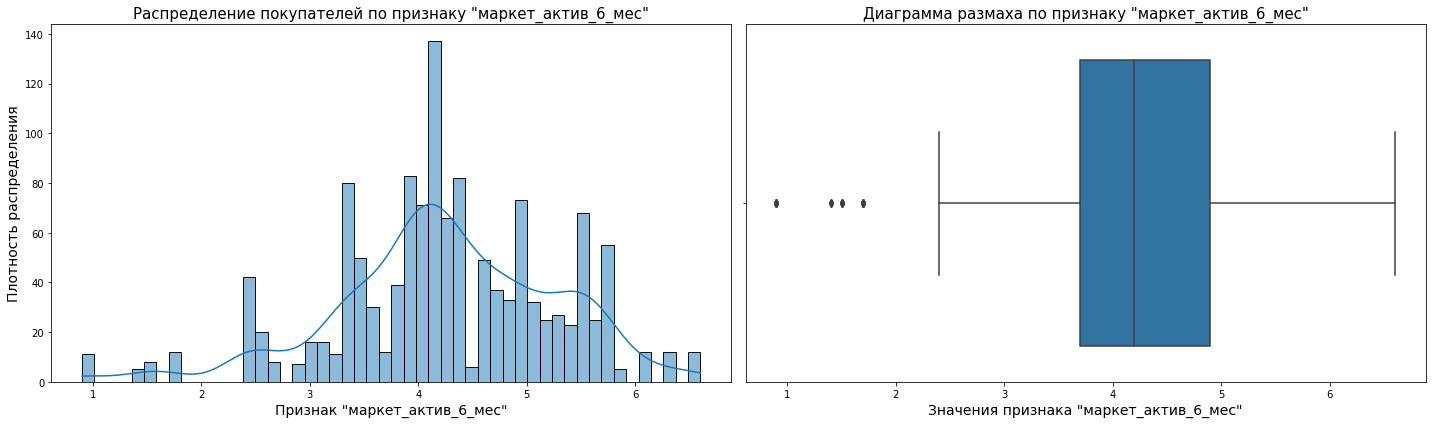

Описательная статистика для признака "маркет_актив_тек_мес":


count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

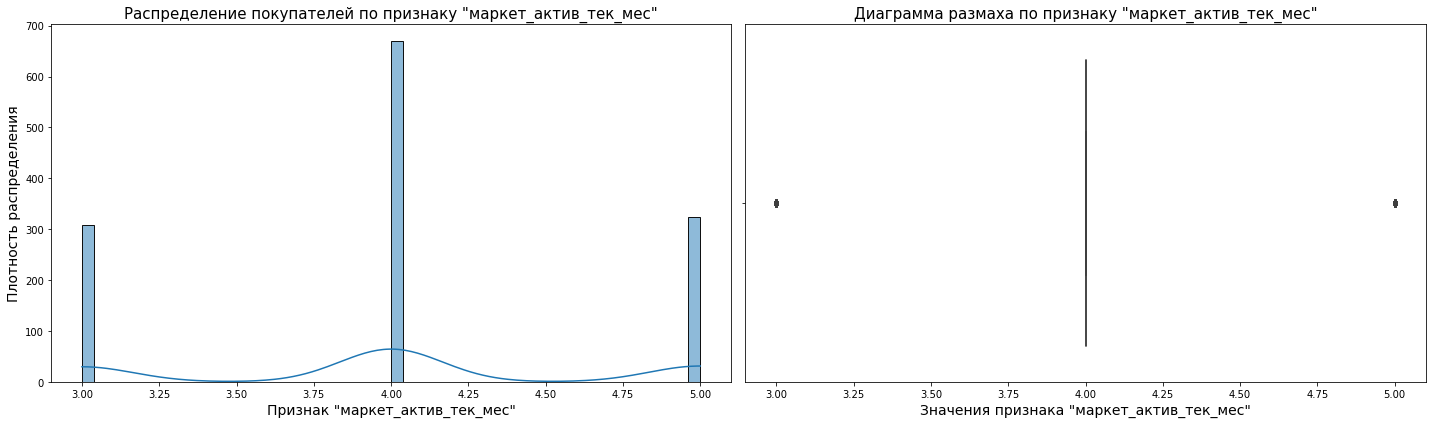

Описательная статистика для признака "длительность":


count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

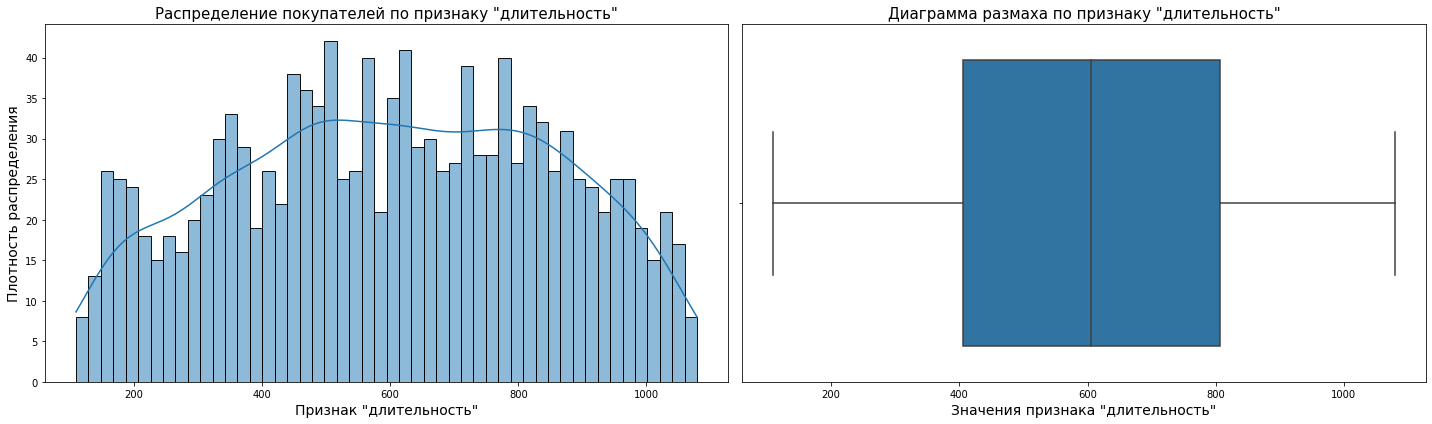

Описательная статистика для признака "акционные_покупки":


count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

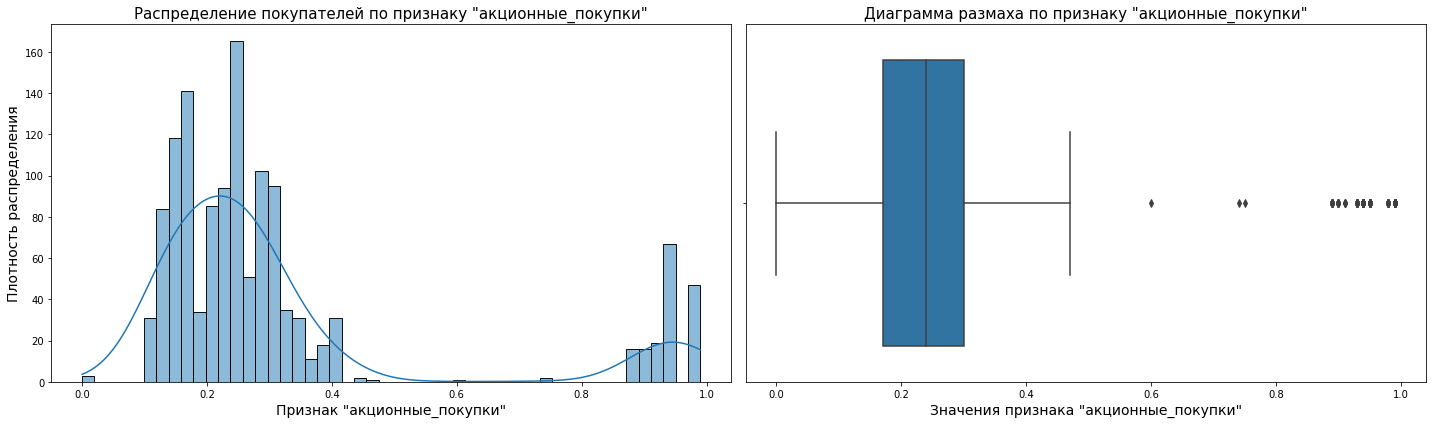

Описательная статистика для признака "средний_просмотр_категорий_за_визит":


count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64

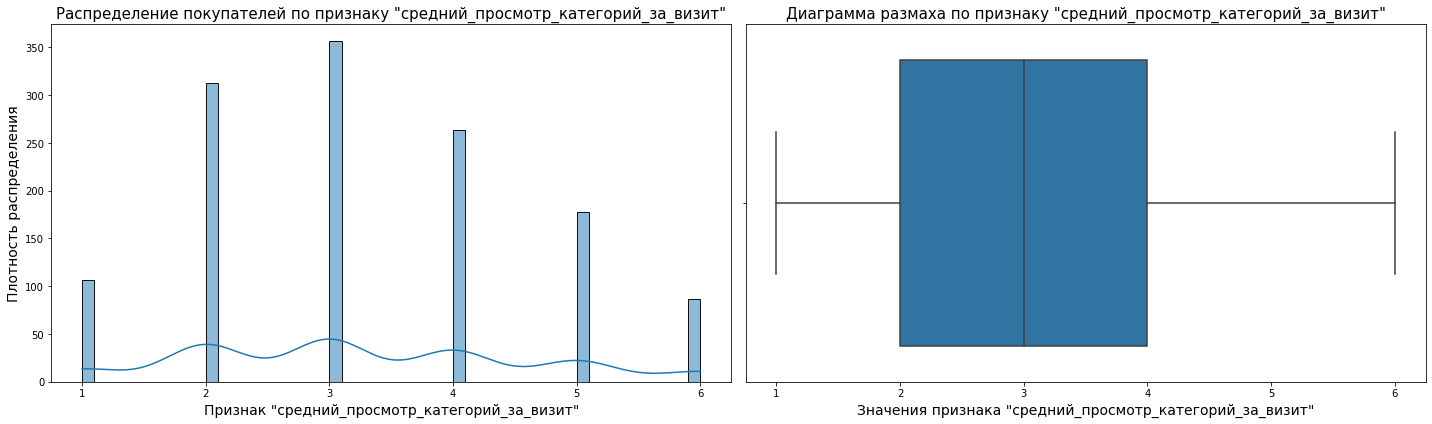

Описательная статистика для признака "неоплаченные_продукты_штук_квартал":


count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

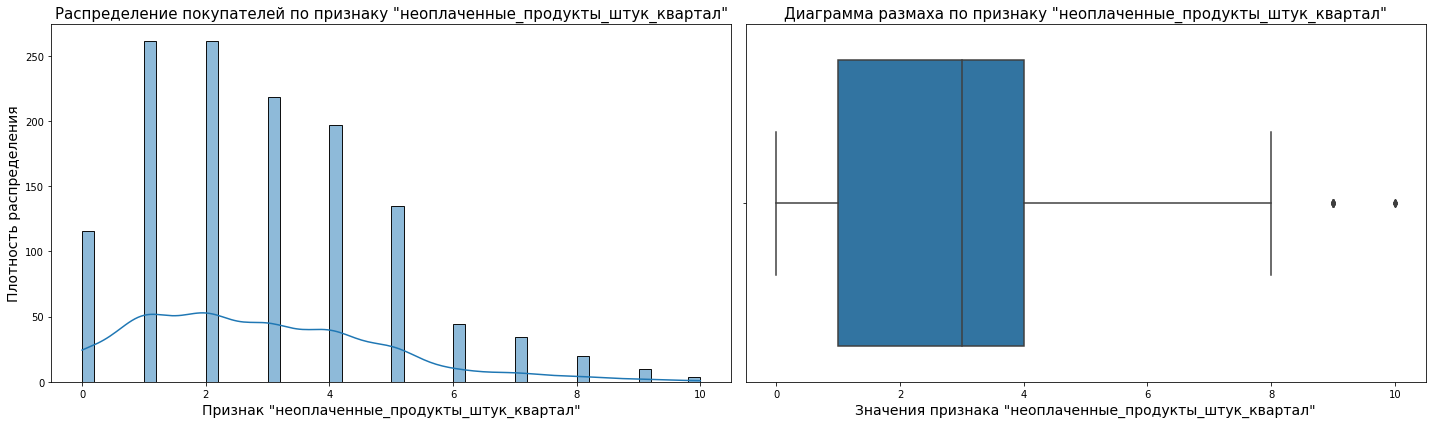

Описательная статистика для признака "ошибка_сервиса":


count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

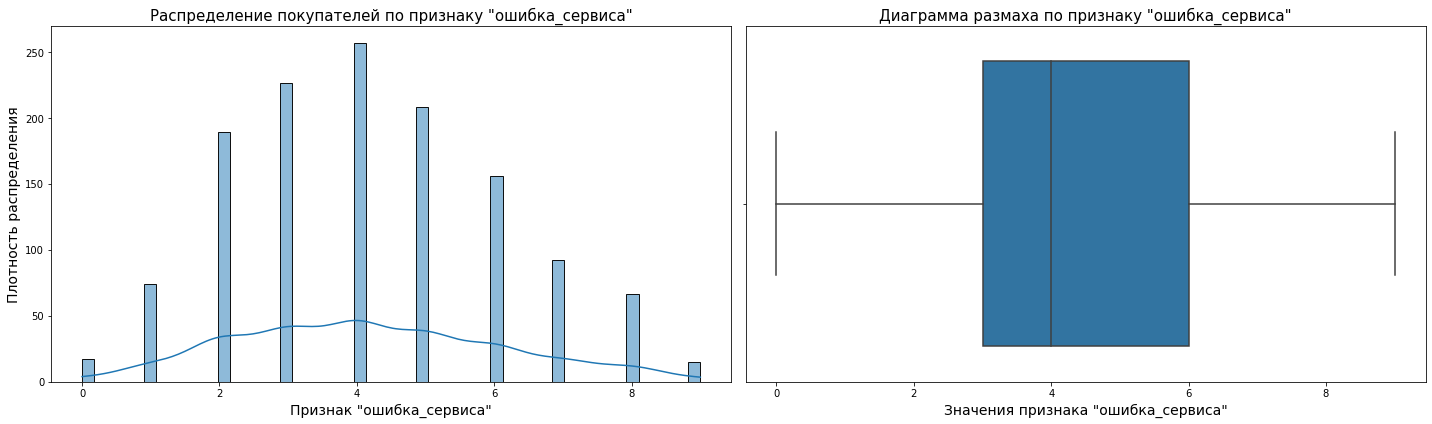

Описательная статистика для признака "страниц_за_визит":


count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

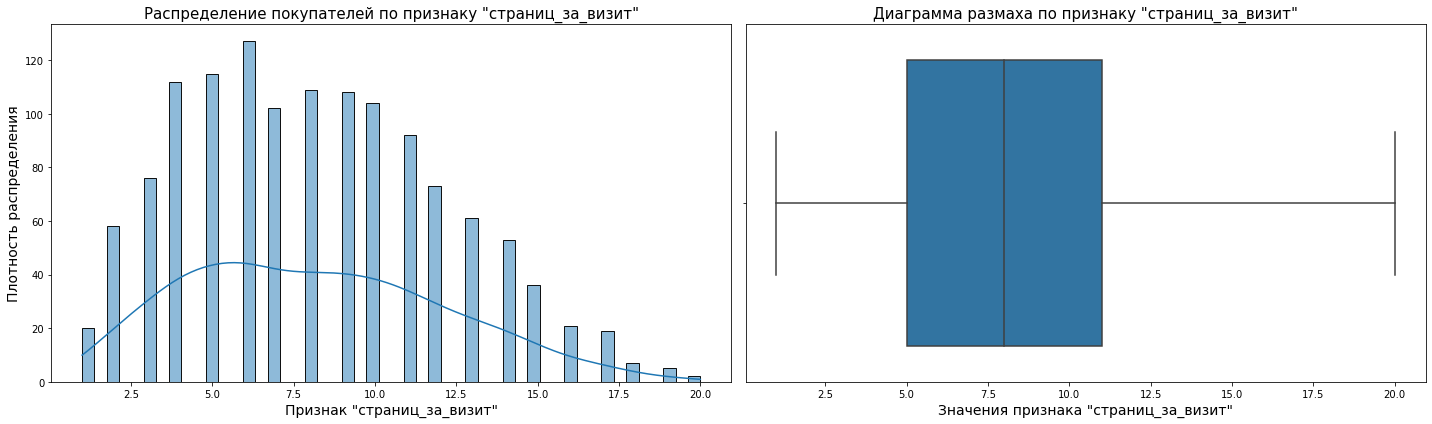

In [17]:
num_features = list(df_market_file.select_dtypes(exclude=['object']).columns)
num_features.pop(0)

for num in num_features:
    viz_col(df_market_file, num)

Количество покупателей по признаку "покупательская_активность":


Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

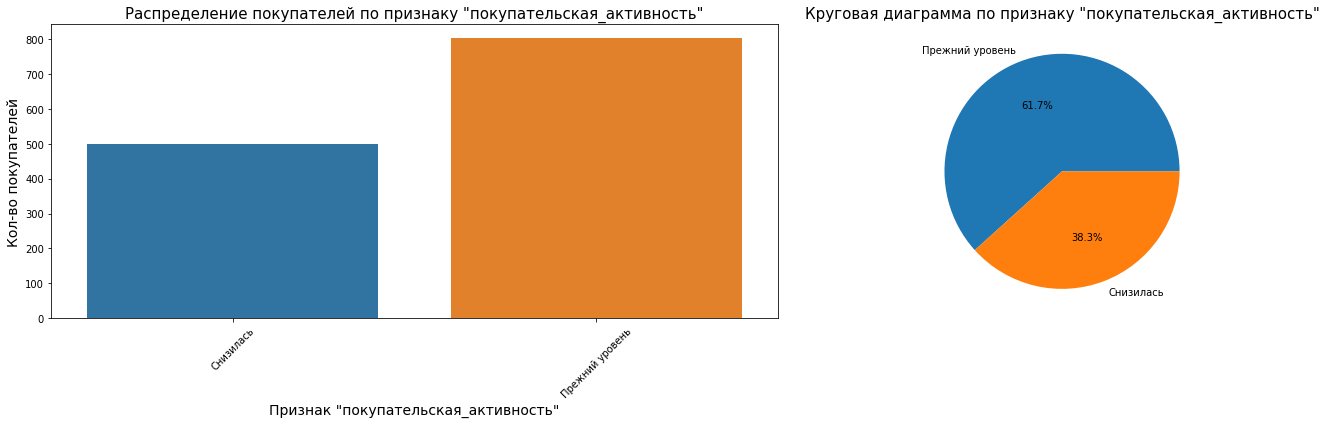

Количество покупателей по признаку "тип_сервиса":


стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

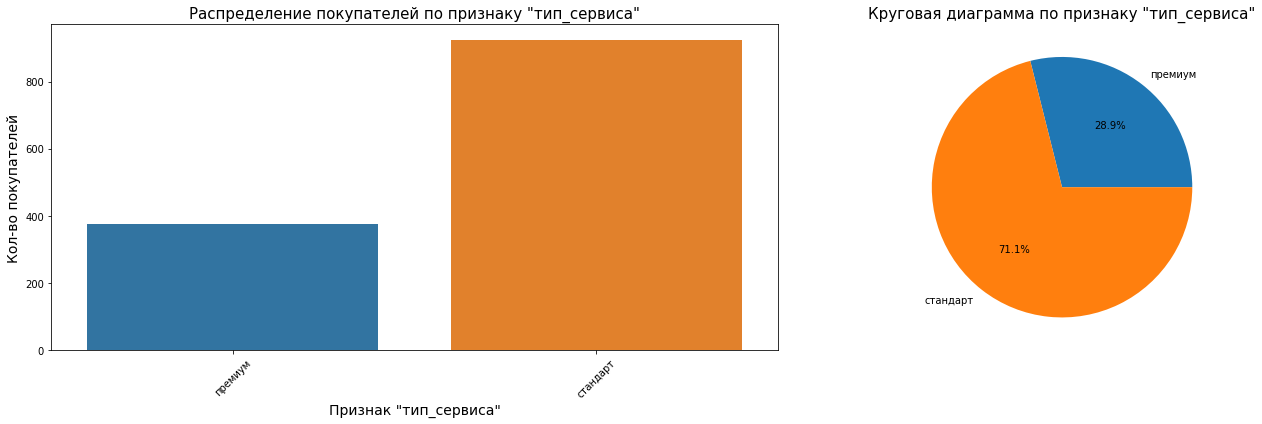

Количество покупателей по признаку "разрешить_сообщать":


да     962
нет    338
Name: разрешить_сообщать, dtype: int64

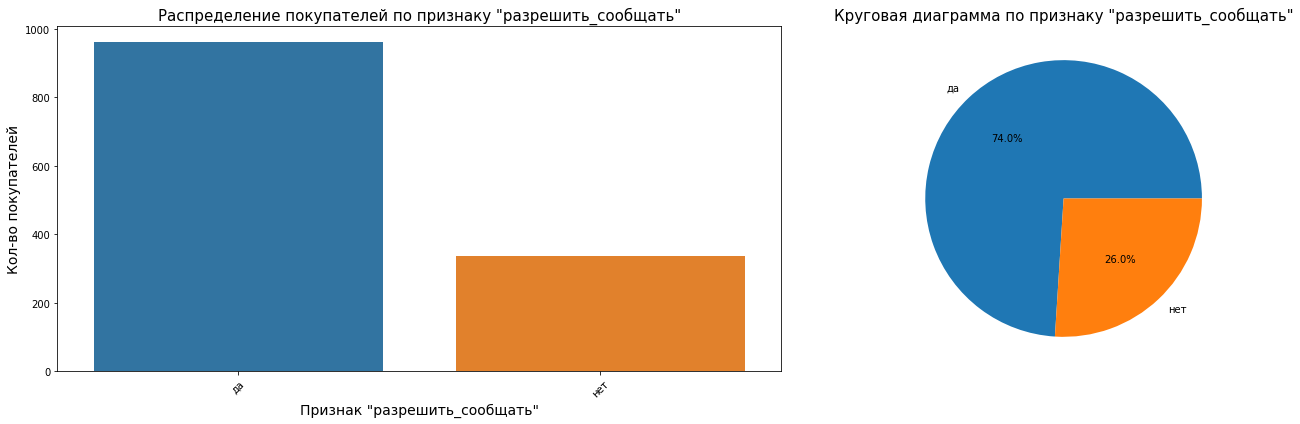

Количество покупателей по признаку "популярная_категория":


Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

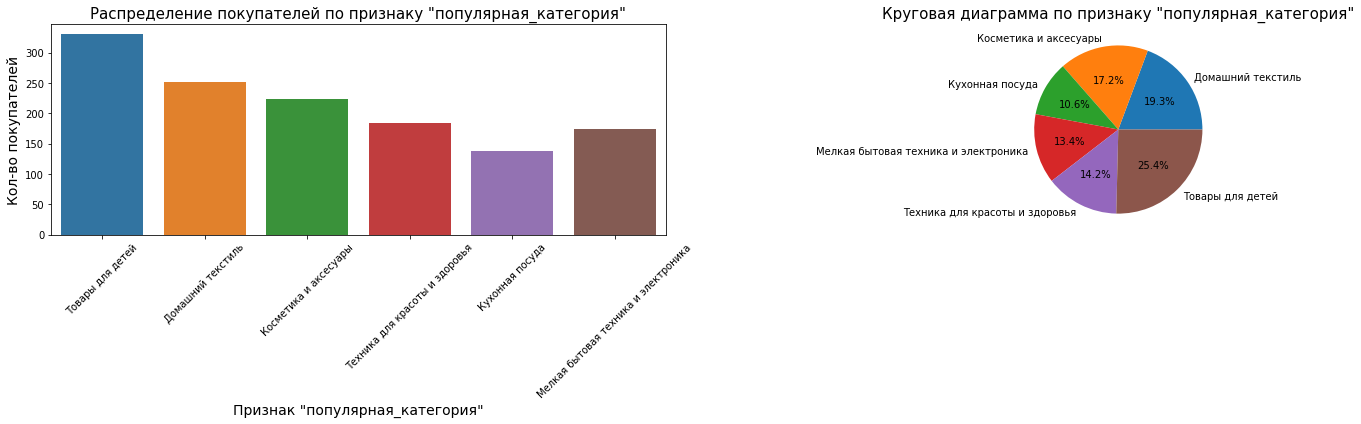

In [18]:
cat_features = list(df_market_file.select_dtypes(include=['object']).columns)

for cat in cat_features:
    viz_cat(df_market_file, cat)

Признак `маркет_актив_6_мес` имеет распределение близкое к нормальному. однако имеются несколько малых значений. Признак `актив_тек_мес` имеет 3 значения. Признак `длительность` имеет близкое к нормальному распределение. Признак `акционные_покупки` имеет бимодальное распределение. Признаки `средний_просмотр_категорий_за_визит`, `неоплаченные_продукты_штук_квартал`, `ошибка_сервиса`, `страниц_за_визит` - прослеживается нормальное распределение.

### Датасет market_money

Описательная статистика для признака "выручка":


count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

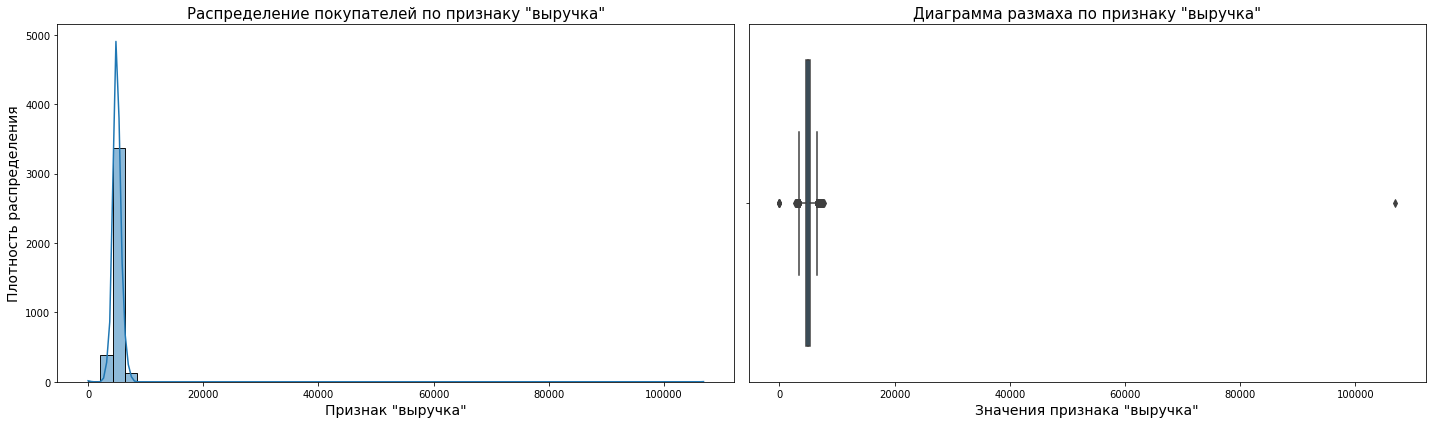

In [19]:
num_features = list(df_market_money.select_dtypes(exclude=['object']).columns)
num_features.pop(0)

for num in num_features:
    viz_col(df_market_money, num)

В значениях явно есть выбросы. Найдем их удалим.

In [20]:
df_market_money[df_market_money['выручка'] > 10000]

id         период   выручка
98  215380  текущий_месяц  106862.2

In [21]:
df_market_money = df_market_money.drop(df_market_money.index[98])

In [22]:
df_market_money[df_market_money['выручка'] < 1000]

id               период  выручка
0   215348  препредыдущий_месяц      0.0
2   215348     предыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0
34  215359     предыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0

Также имеются 6 значений с нулевой выручкой. Удалим данные показатели.

In [23]:
#запишем id данных удаленных покупателей для будущего
list_clients_for_del = [215348, 215357, 215359, 215380]
list_clients_for_del

[215348, 215357, 215359, 215380]

In [24]:
df_market_money = df_market_money[df_market_money['выручка'] > 1000]

Описательная статистика для признака "выручка":


count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

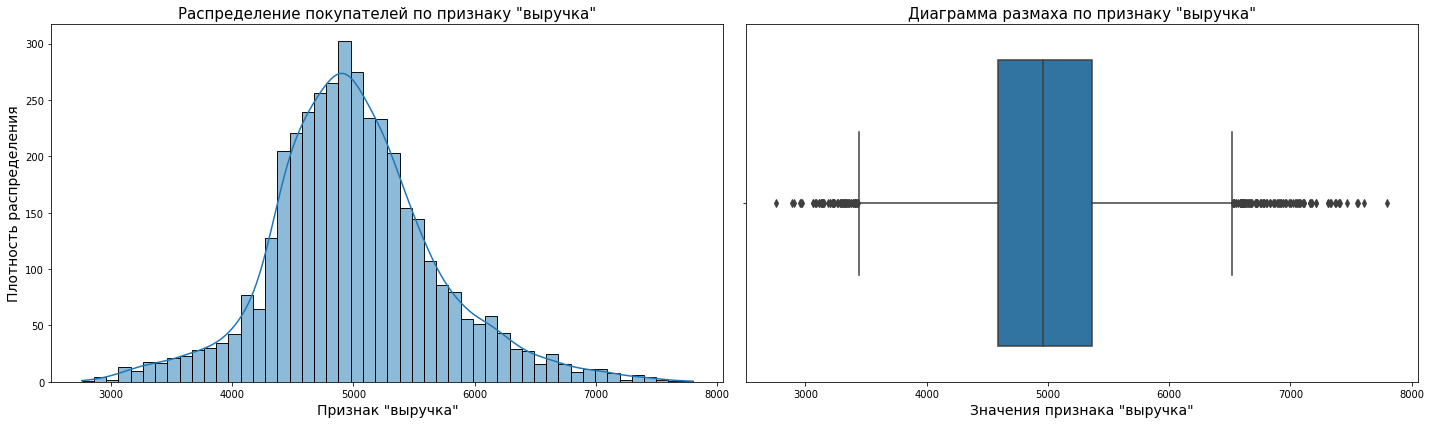

In [25]:
for num in num_features:
    viz_col(df_market_money, num)

Количество покупателей по признаку "период":


текущий_месяц          1299
препредыдущий_месяц    1297
предыдущий_месяц       1297
Name: период, dtype: int64

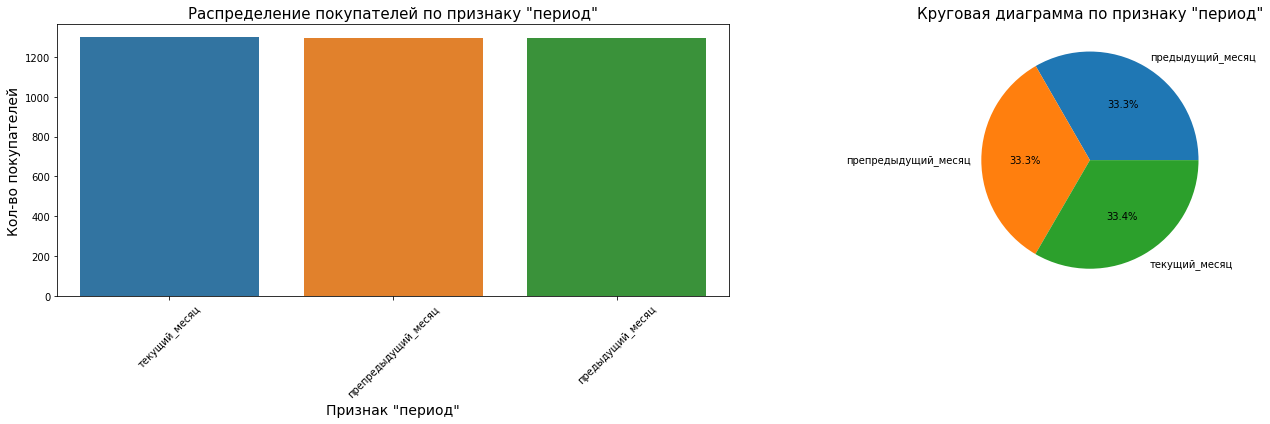

In [26]:
cat_features = list(df_market_money.select_dtypes(include=['object']).columns)

for cat in cat_features:
    viz_cat(df_market_money, cat)

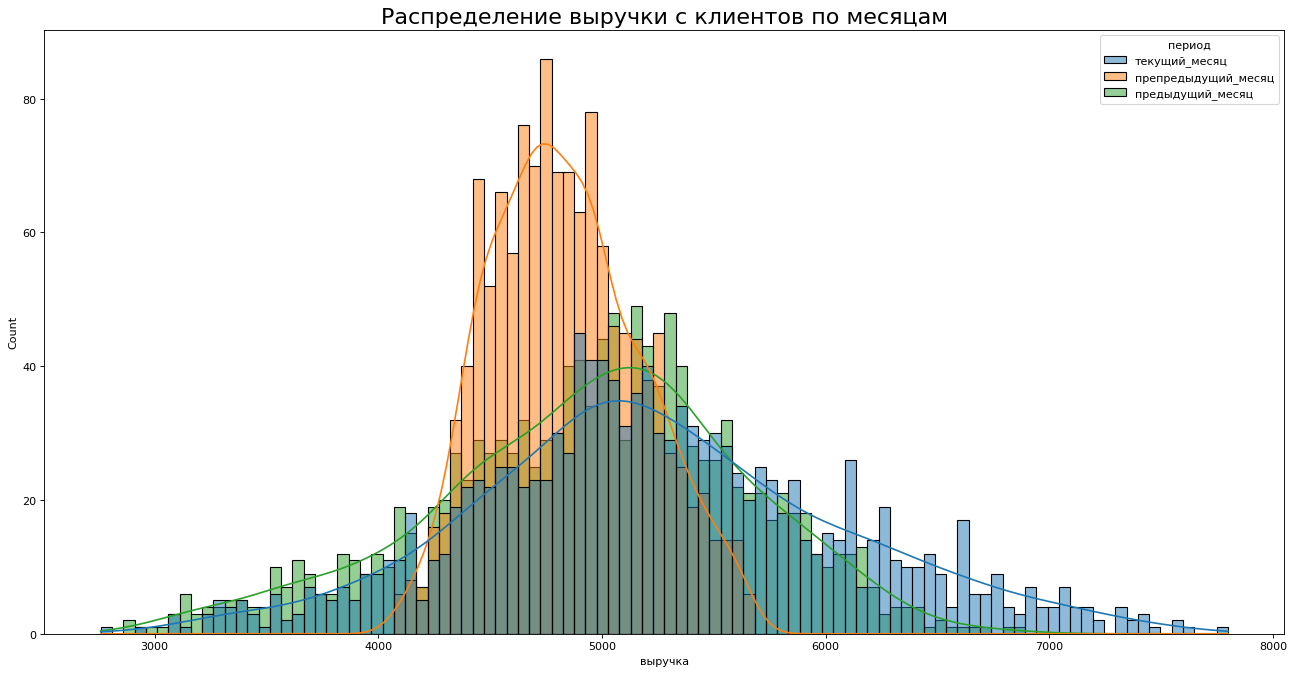

In [27]:
plt.figure(figsize=(20,10), dpi = 80)
sns.histplot(data=df_market_money, x='выручка', hue='период', kde=True, bins=100)
plt.title('Распределение выручки с клиентов по месяцам', fontsize=20)
plt.show();

При работе с датафреймом были удалены аномальные значения. Признак `выручка` распределен нормально. Несмотря на то, что в каждый из трех месяцев были приблизтельно одинаковое количество покупателей, показатели распределения выручки с покупателей в разные месяцы различались. 

### Датасет market_time

Описательная статистика для признака "минуты":


count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минуты, dtype: float64

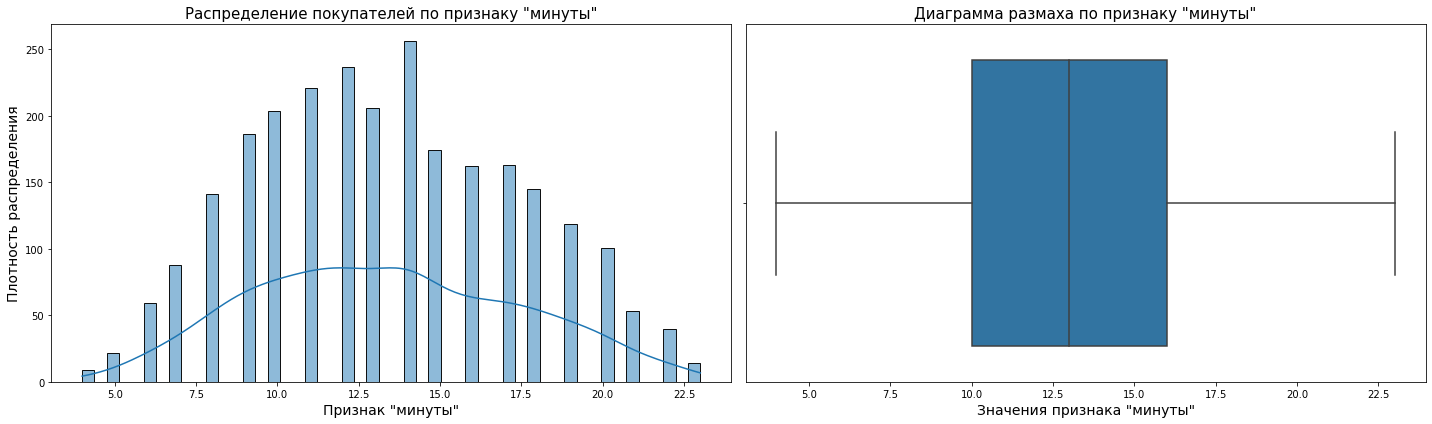

In [28]:
num_features = list(df_market_time.select_dtypes(exclude=['object']).columns)
num_features.pop(0)

for num in num_features:
    viz_col(df_market_time, num)

Количество покупателей по признаку "период":


предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

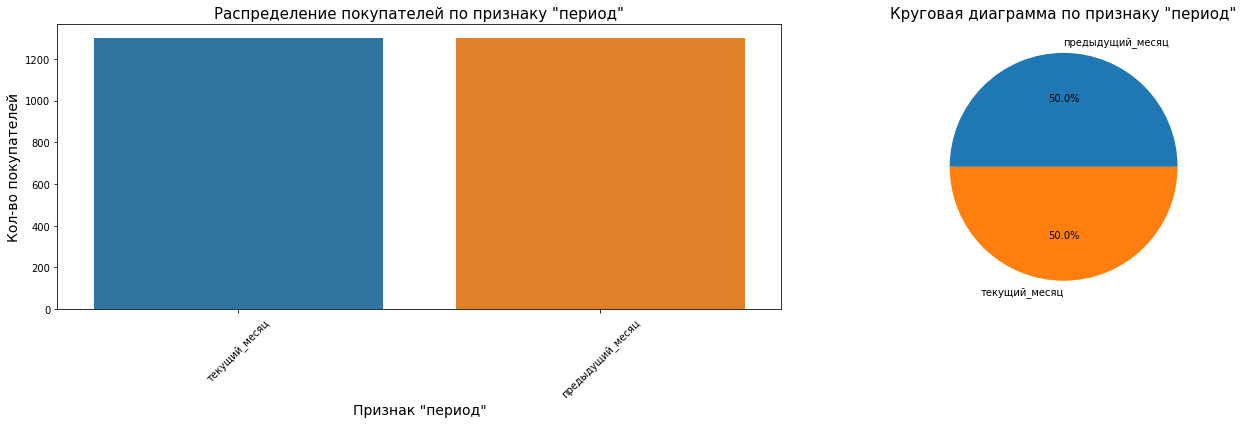

In [29]:
cat_features = list(df_market_time.select_dtypes(include=['object']).columns)

for cat in cat_features:
    viz_cat(df_market_time, cat)

Можно наблюдать распределение признака `минуты` близкое к нормальному. Количество покупателей в предыдущий и текущий месяц одинаково.

### Датасет money

Описательная статистика для признака "прибыль":


count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

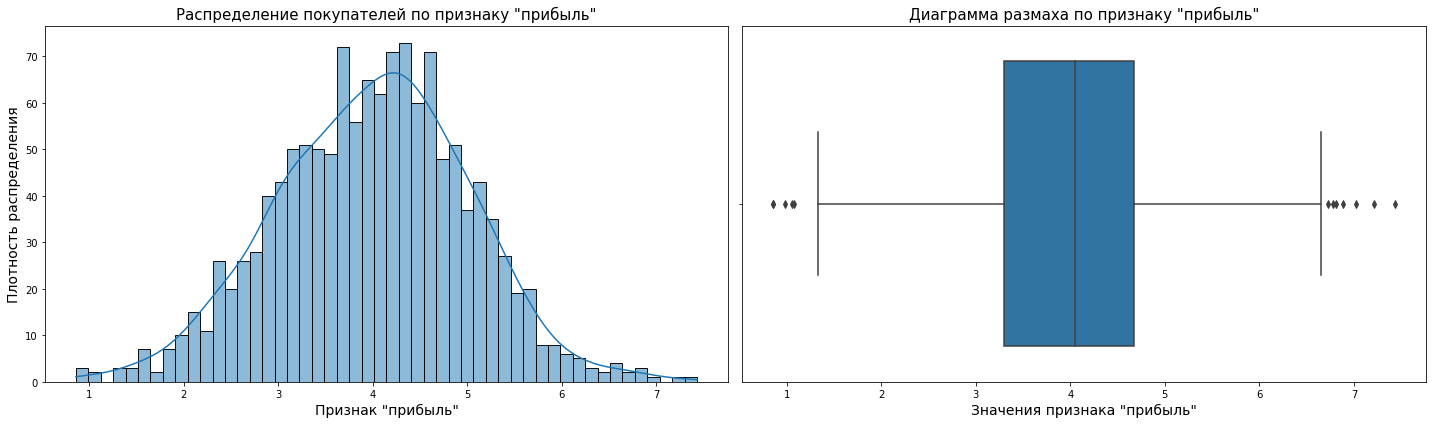

In [30]:
num_features = list(df_money.select_dtypes(exclude=['object']).columns)
num_features.pop(0)

for num in num_features:
    viz_col(df_money, num)

Признак `прибыль` в датасете `money` распределен нормально.

### Клиенты с покупательской активностью не менее трёх месяцев

In [31]:
df_market_money.query('выручка == 0')

Empty DataFrame
Columns: [id, период, выручка]
Index: []

Ранее мы удалили покупателей с нулевым значением прибыли из датафрейма `market_money` (строчка кода сверху это подтверждает). Удалим данных покупателей из других датасетов.

In [32]:
print(f'Количество строк в market_file до удаления: {df_market_file.shape[0]}')
index_to_remove = df_market_file[df_market_file['id'].isin(list_clients_for_del)].index
df_market_file.drop(index_to_remove, inplace=True)
print(f'Количество строк в market_file после удаления: {df_market_file.shape[0]}')

Количество строк в market_file до удаления: 1300
Количество строк в market_file после удаления: 1296


In [33]:
print(f'Количество строк в market_time до удаления: {df_market_time.shape[0]}')
index_to_remove = df_market_time[df_market_time['id'].isin(list_clients_for_del)].index
df_market_time.drop(index_to_remove, inplace=True)
print(f'Количество строк в market_time после удаления: {df_market_time.shape[0]}')

Количество строк в market_time до удаления: 2600
Количество строк в market_time после удаления: 2592


In [34]:
print(f'Количество строк в money до удаления: {df_money.shape[0]}')
index_to_remove = df_money[df_money['id'].isin(list_clients_for_del)].index
df_money.drop(index_to_remove, inplace=True)
print(f'Количество строк в money после удаления: {df_money.shape[0]}')

Количество строк в money до удаления: 1300
Количество строк в money после удаления: 1296


Клиенты с покупательской активностью не менее трёх месяцев отобраны в соответсвии с заданием.

**Вывод:** 
* В датасете `market_file` - признак `маркет_актив_6_мес` имеет распределение близкое к нормальному. Однако имеются несколько малых значений. Признак `актив_тек_мес` имеет 3 значения. Признак `длительность` имеет близкое к нормальному распределение. Признак `акционные_покупки` имеет бимодальное распределение. Признаки `средний_просмотр_категорий_за_визит`, `неоплаченные_продукты_штук_квартал`, `ошибка_сервиса`, `страниц_за_визит` - прослеживается нормальное распределение.
* В датасете `market_money` - при работе с датафреймом были удалены аномальные значения. Признак `выручка` распределен нормально. Несмотря на то, что в каждый из трех месяцев были приблизтельно одинаковое количество покупателей, показатели распределения выручки с покупателей в разные месяцы различались. 
* В датасете `market_time` - можно наблюдать распределение признака `минуты` близкое к нормальному. Количество покупателей в предыдущий и текущий месяц одинаково.
* В датасете `money` - признак `прибыль` в датасете `money` распределен нормально.
* Клиенты с покупательской активностью не менее трёх месяцев отобраны в соответсвии с заданием.

## Объединение таблиц

Объединим таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании нам не понадобятся. 

В итоговой таблице сделаем отдельный столбец для каждого периода.

In [35]:
# преобразуем датафрейм через сводную таблицу
df_market_money_new = df_market_money.pivot_table(index='id', values='выручка', columns='период', aggfunc='first')
df_market_money_new.head()

период  предыдущий_месяц  препредыдущий_месяц  текущий_месяц
id                                                          
215348               NaN                  NaN         3293.1
215349            5216.0               4472.0         4971.6
215350            5457.5               4826.0         5058.4
215351            6158.0               4793.0         6610.4
215352            5807.5               4594.0         5872.5

In [36]:
# переименовываем столбцы
df_market_money_new.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
display(df_market_money_new.head())
display(f'Количество строк: {df_market_money_new.shape[0]}')

выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215348                       NaN                          NaN   
215349                    5216.0                       4472.0   
215350                    5457.5                       4826.0   
215351                    6158.0                       4793.0   
215352                    5807.5                       4594.0   

        выручка_текущий_месяц  
id                             
215348                 3293.1  
215349                 4971.6  
215350                 5058.4  
215351                 6610.4  
215352                 5872.5

'Количество строк: 1300'

In [37]:
# преобразуем значения в столбце в столбцы
df_market_time_new = df_market_time.pivot_table(index='id', values='минуты', columns='период', aggfunc='first')
display(df_market_time_new.head())
display(f'Количество строк: {df_market_time_new.shape[0]}')

период  предыдущий_месяц  текущий_месяц
id                                     
215349                12             10
215350                 8             13
215351                11             13
215352                 8             11
215353                10             10

'Количество строк: 1296'

In [38]:
# переименовываем столбцы
df_market_time_new.columns = ['минуты_предыдущий_месяц', 'минуты_текущий_месяц']
df_market_time_new.shape[0]

1296

In [39]:
df_market_file.shape[0]

1296

In [40]:
# объединяем таблицы и проверяем поэтапно
df_main = df_market_file.merge(df_market_money_new, on='id', how='left')
df_main.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   выручка_текущий_месяц  
0                 4971.6  
1                 5058.4  
2                 6610.4  
3                 5872.5  
4                 5388.5

In [41]:
df_main = df_main.merge(df_market_time_new, on='id', how='left')
df_main.sample(10)

id покупательская_активность тип_сервиса разрешить_сообщать  \
216   215568                 Снизилась     премиум                 да   
426   215778           Прежний уровень    стандарт                 да   
174   215526                 Снизилась    стандарт                 да   
800   216152           Прежний уровень    стандарт                 да   
1226  216578           Прежний уровень    стандарт                 да   
487   215839                 Снизилась     премиум                 да   
1038  216390           Прежний уровень    стандарт                 да   
735   216087           Прежний уровень    стандарт                нет   
817   216169           Прежний уровень     премиум                 да   
731   216083           Прежний уровень    стандарт                 да   

      маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
216                  4.0                     5          1073   
426                  4.3                     4           609   
174                  3.1                     4           572   
800                  5.8                     5           339   
1226                 4.4                     4           593   
487                  2.6                     4          1048   
1038                 6.1                     5           876   
735                  5.1                     4           166   
817                  4.1                     3           748   
731                  4.4                     5           623   

      акционные_покупки                  популярная_категория  \
216                0.40                      Товары для детей   
426                0.24                      Товары для детей   
174                0.29                     Домашний текстиль   
800                0.23                 Косметика и аксесуары   
1226               0.30                 Косметика и аксесуары   
487                0.14        Техника для красоты и здоровья   
1038               0.17                      Товары для детей   
735                0.31                      Товары для детей   
817                0.13  Мелкая бытовая техника и электроника   
731                0.28  Мелкая бытовая техника и электроника   

      средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
216                                     4                                   2   
426                                     4                                   3   
174                                     1                                   8   
800                                     3                                   2   
1226                                    4                                   1   
487                                     3                                   0   
1038                                    3                                   3   
735                                     5                                   1   
817                                     3                                   1   
731                                     2                                   2   

      ошибка_сервиса  страниц_за_визит  выручка_предыдущий_месяц  \
216                3                 3                    2909.0   
426                5                15                    4911.0   
174                8                 5                    5880.5   
800                5                 9                    5053.0   
1226               7                10                    5200.5   
487                2                12                    4987.0   
1038               5                 8                    3931.0   
735                5                 9                    5140.0   
817                5                 6                    4943.0   
731                6                17                    5994.0   

      выручка_препредыдущий_месяц  выручка_текущий_месяц  \
216                        4740.0                 3933.4   
426                     

**Вывод:** Объединили таблицы market_file.csv, market_money.csv, market_time.csv.

## Корреляционный анализ 

In [42]:
# делаем из столбца id индекс
df_main = df_main.set_index('id')
df_main.head()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215349                    5216.0                       4472.0   
215350                    5457.5                       4826.0   
215351                    6158.0                       4793.0   
215352                    5807.5                       4594.0   
215353                    4738.5                       5124.0   

        выручка_текущий_месяц  минуты_предыдущий_месяц  минуты_текущий_месяц  
id                                                                            
215349                 4971.6                       12                    10  
215350                 5058.4                        8                    13  
215351                 6610.4                       11                    13  
215352                 5872.5                        8                    11  
215353                 5388.5                       10                    10

Для оценки корреляции используем коэффициент Фи.

In [43]:
num_features = list(df_main.select_dtypes(exclude=['object']).columns)
corr = df_main.phik_matrix(interval_cols=num_features)
corr

покупательская_активность  тип_сервиса  \
покупательская_активность                             1.000000     0.129940   
тип_сервиса                                           0.129940     1.000000   
разрешить_сообщать                                    0.000000     0.289965   
маркет_актив_6_мес                                    0.544831     0.089911   
маркет_актив_тек_мес                                  0.000000     0.045258   
длительность                                          0.099901     0.401411   
акционные_покупки                                     0.506276     0.030010   
популярная_категория                                  0.299717     0.070809   
средний_просмотр_категорий_за_визит                   0.539607     0.185391   
неоплаченные_продукты_штук_квартал                    0.505655     0.120027   
ошибка_сервиса                                        0.224154     0.079515   
страниц_за_визит                                      0.749888     0.102594   
выручка_предыдущий_месяц                              0.224638     0.000000   
выручка_препредыдущий_месяц                           0.497393     0.069704   
выручка_текущий_месяц                                 0.197213     0.124216   
минуты_предыдущий_месяц                               0.685138     0.131814   
минуты_текущий_месяц                                  0.576770     0.000000   

                                     разрешить_сообщать  маркет_актив_6_мес  \
покупательская_активность                      0.000000            0.544831   
тип_сервиса                                    0.289965            0.089911   
разрешить_сообщать                             1.000000            0.000000   
маркет_актив_6_мес                             0.000000            1.000000   
маркет_актив_тек_мес                           0.052618            0.079854   
длительность                                   0.253831            0.000000   
акционные_покупки                              0.012198            0.279553   
популярная_категория                           0.073684            0.150386   
средний_просмотр_категорий_за_визит            0.070359            0.206788   
неоплаченные_продукты_штук_квартал             0.195982            0.289421   
ошибка_сервиса                                 0.021839            0.142401   
страниц_за_визит                               0.042134            0.396769   
выручка_предыдущий_месяц                       0.080842            0.155476   
выручка_препредыдущий_месяц                    0.000000            0.315331   
выручка_текущий_месяц                          0.060907            0.039795   
минуты_предыдущий_месяц                        0.038387            0.363950   
минуты_текущий_месяц                           0.000000            0.330601   

                                     маркет_актив_тек_мес  длительность  \
покупательская_активность                        0.000000      0.099901   
тип_сервиса                                      0.045258      0.401411   
разрешить_сообщать                               0.052618      0.253831   
маркет_актив_6_мес                               0.079854      0.000000   
маркет_актив_тек_мес                             1.000000      0.174233   
длительность                                     0.174233      1.000000   
акционные_покупки                                0.000000      0.000000   
популярная_категория                             0.136243      0.000000   
средний_просмотр_категорий_за_визит              0.246633      0.186795   
неоплаченные_продукты_штук_квартал               0.144203      0.192611   
ошибка_сервиса                                   0.116946      0.175608   
страниц_за_визит                                 0.000000      0.122495   
выручка_предыдущий_месяц                         0.051824      0.125572   
выручка_препредыдущий_месяц                      0.000000      0.113200   
выручка_текущий_месяц                            0.000000      0.1

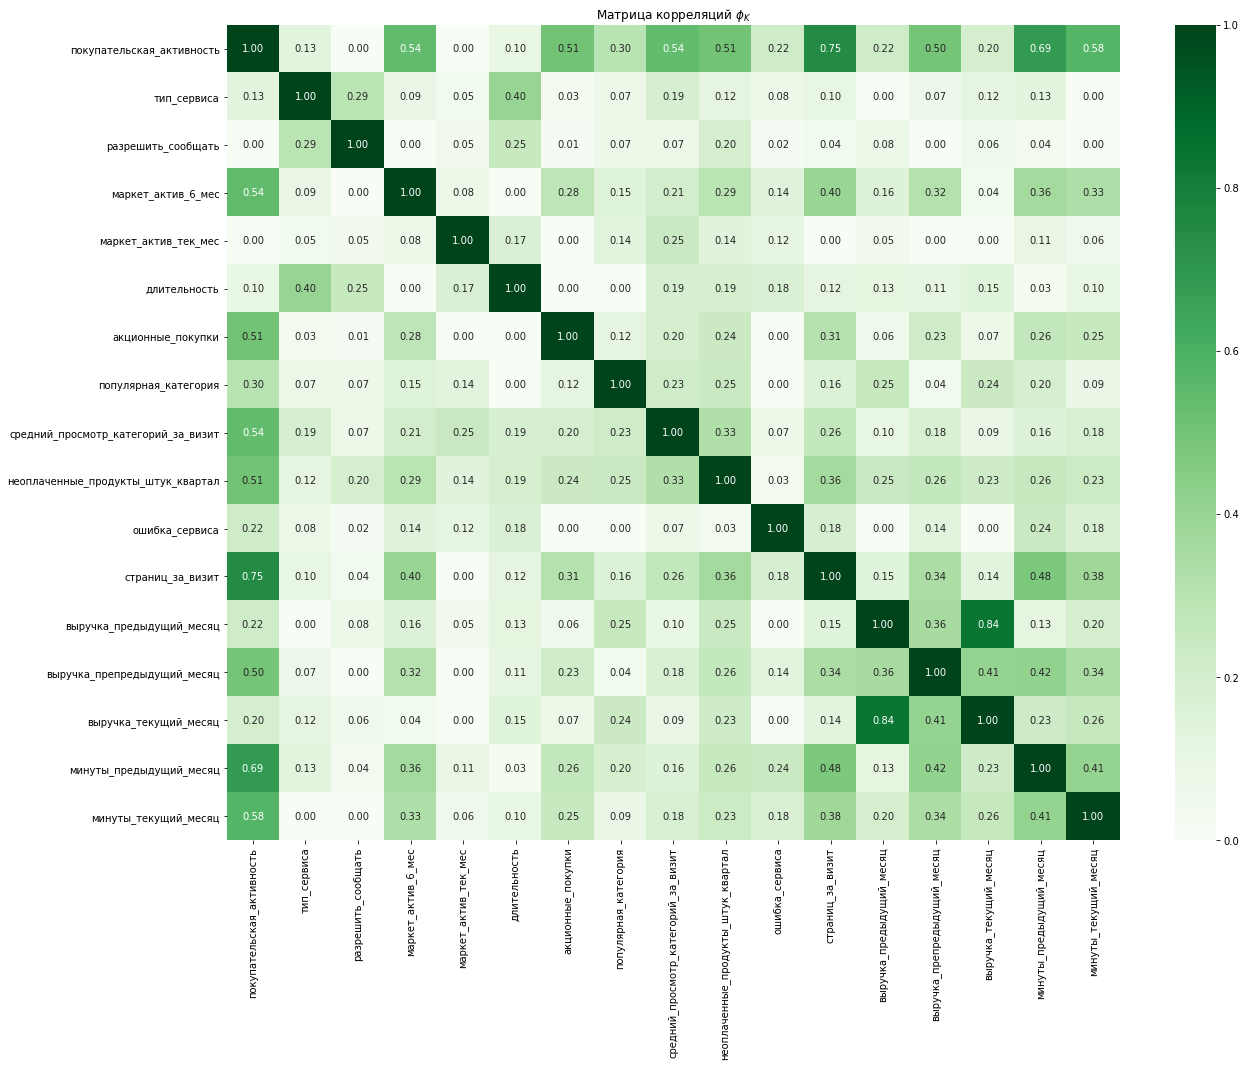

In [44]:
# визуализируем данные
plt.figure(figsize=(20, 15))  
sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f') 
plt.title('Матрица корреляций $\phi_K$')
plt.show()

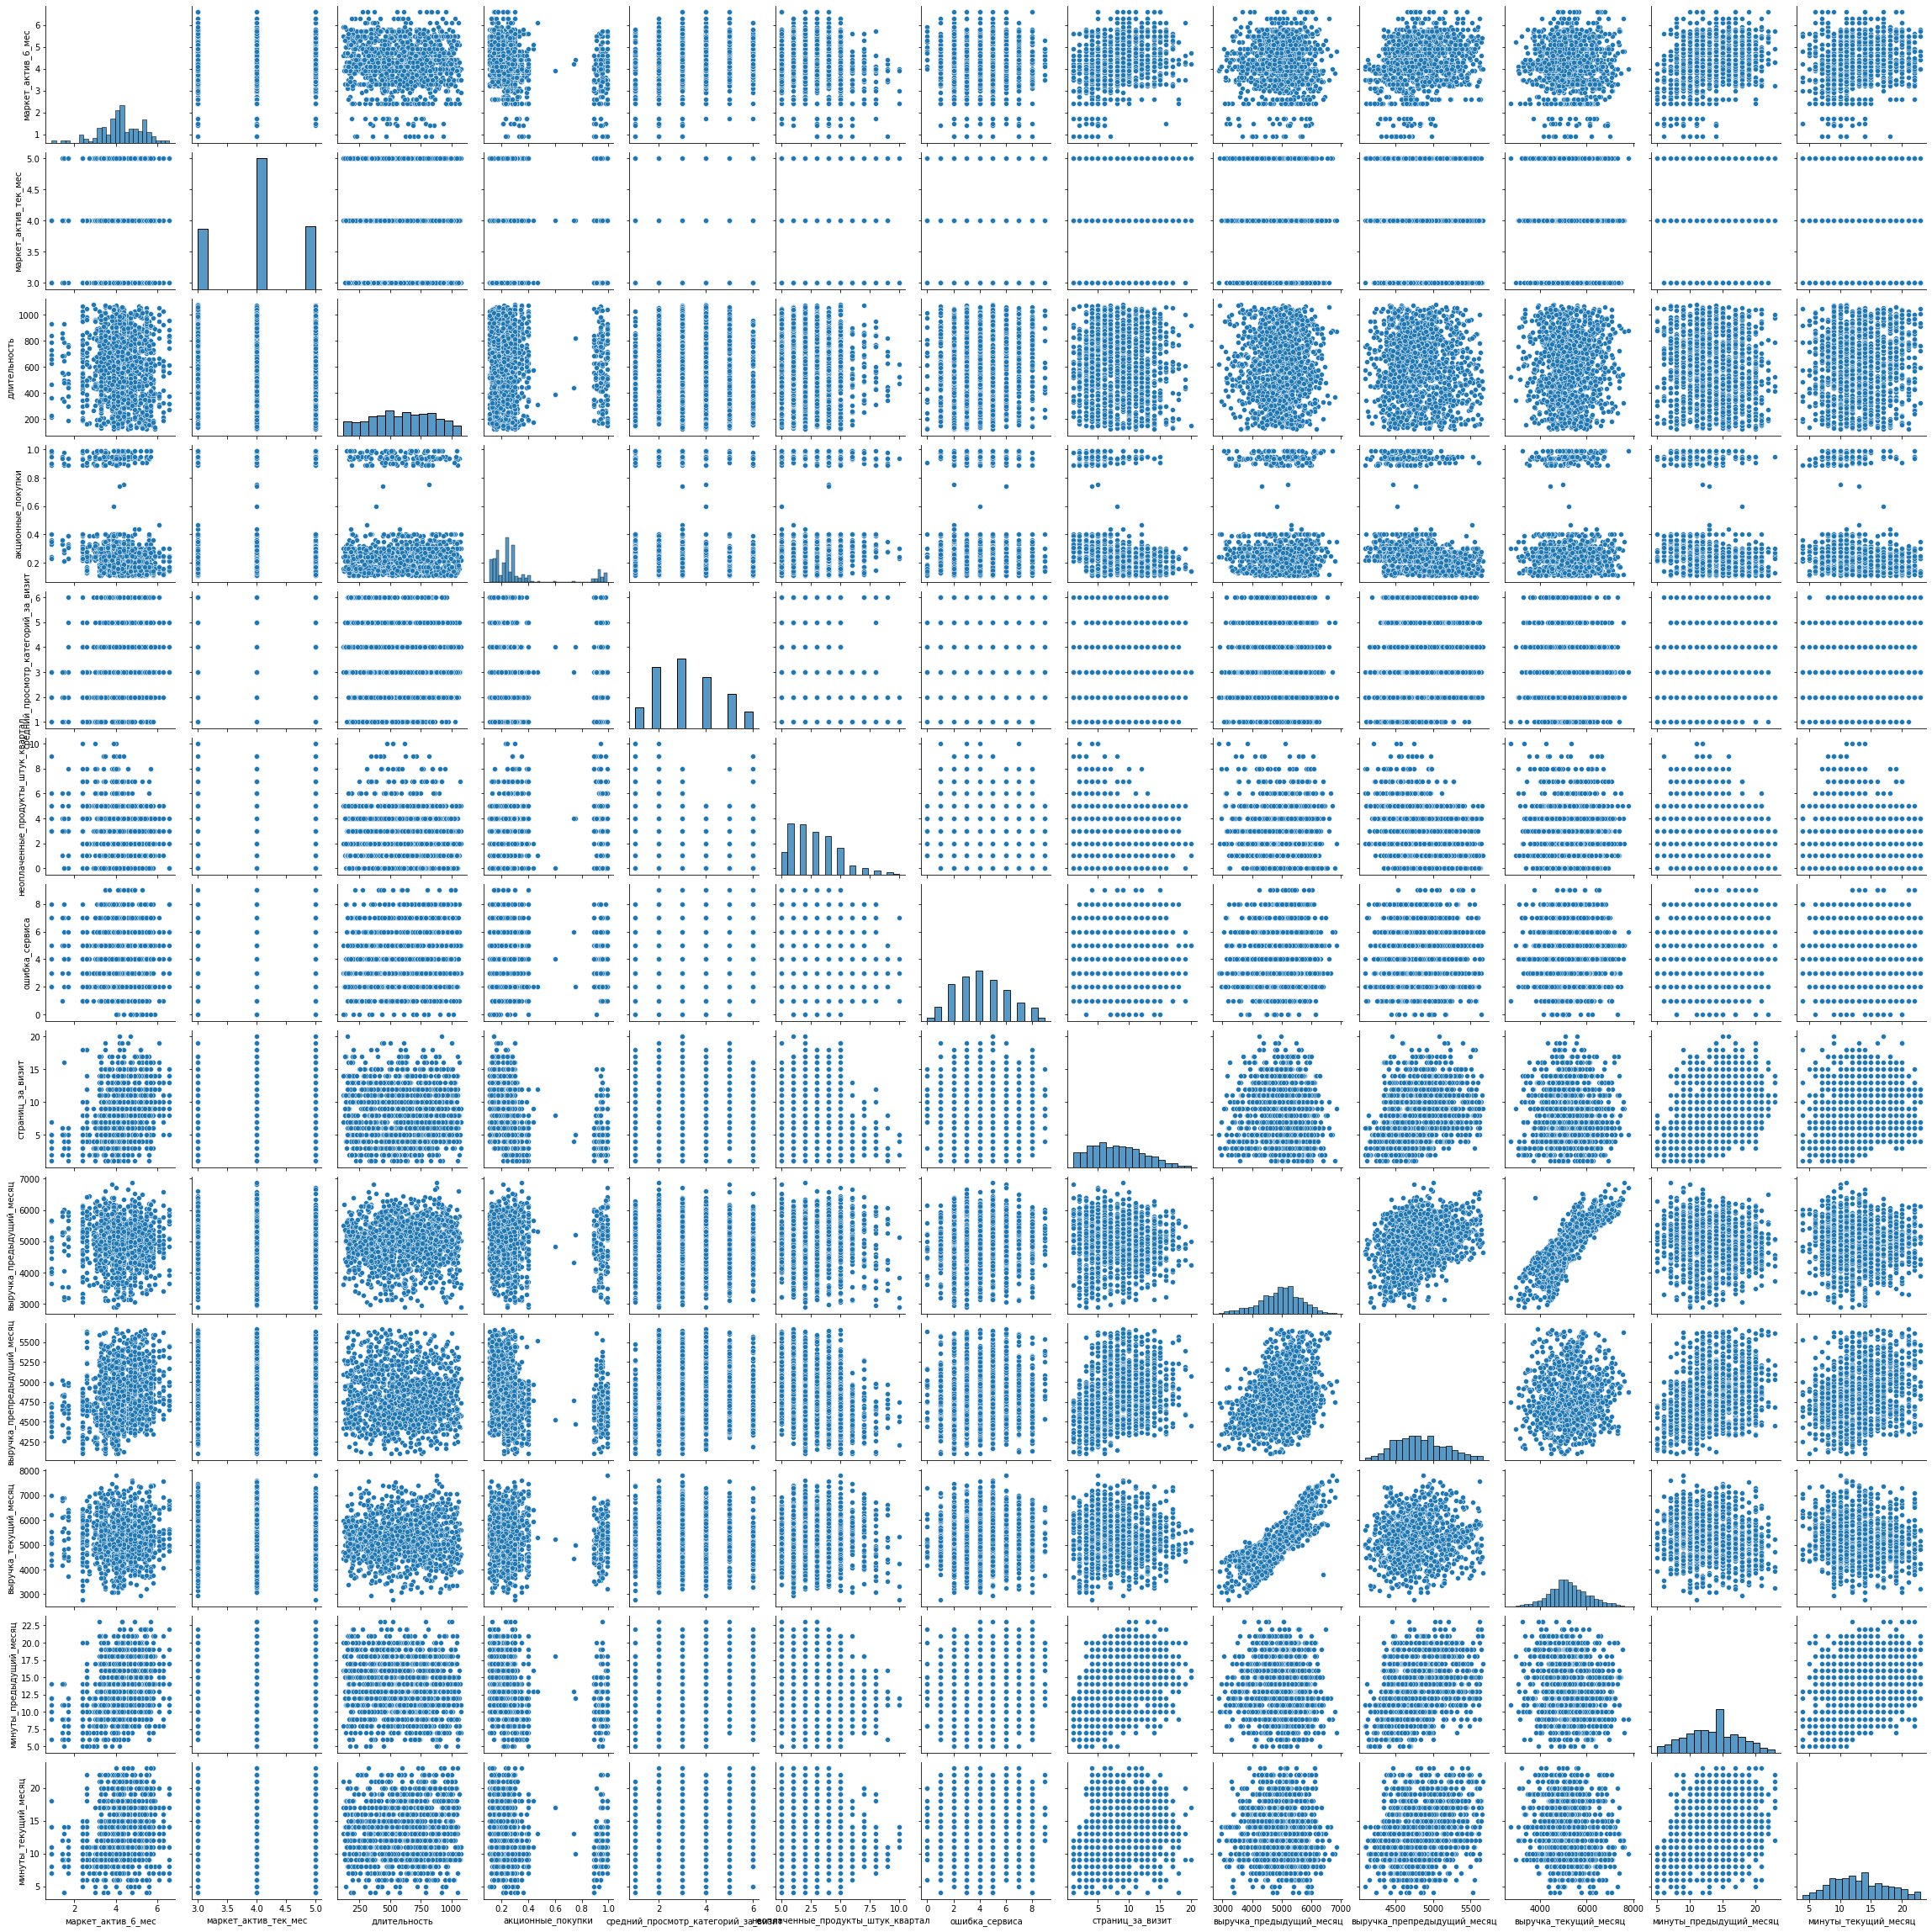

In [45]:
#построение графиков зависимости для количественных данных

sns.pairplot(df_main[num_features], kind='scatter', markers='o')
plt.show()

**Вывод:** корреляция с целевым признаком `покупательская_активность` больше 0.5 отмечается у следующих признаков: `маркет_актив_6_мес` (0.54), `акционные_покупки` (0.51), `средний_просмотр_категорий_за _визит` (0.54), `неоплаченные_продукты_штук_квартал` (0.51), `страниц_за_визит` (0.75), `выручка_предыдущий_месяц` (0.50), `минуты_предыдущий_месяц` (0.69), `минуты_текущий_месяц` (0.58). Мультиколинеарность отсутсвует. Также сильная корреляци янаблюдается между признаками `выручка_предыдущий_месяц` и `выручка_текущий месяц`.

## Использование пайплайнов

Применим все изученные модели. Для этого используем пайплайны.

Во время подготовки данных используем ColumnTransformer. Количественные и категориальные признаки обработаем в пайплайне раздельно. Для кодирования категориальных признаков используем как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.

Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберем как минимум один гиперпараметр. Выберем подходящую для задачи метрику. Используем эту метрику при подборе гиперпараметров.

Выберем лучшую модель, используя заданную метрику. Для этого применим стратегию: использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [46]:
# разбиение на тренировочную и тестовую выборку

X = df_main.drop('покупательская_активность', axis=1)
y = df_main['покупательская_активность']

RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

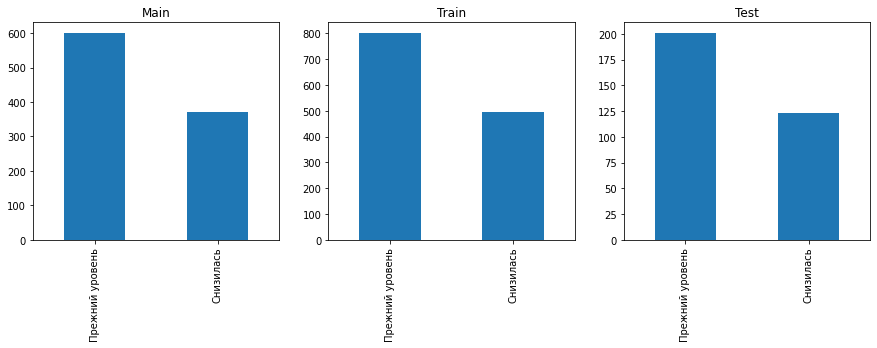

In [47]:
# проверка дисбаланса классов
fig, axs = plt.subplots(1, 3 , figsize=(15,4))
y.value_counts().plot(kind='bar', ax=axs[1])
axs[0].set_title('Main')
y_train.value_counts().plot(kind='bar', ax=axs[0])
axs[1].set_title('Train')
y_test.value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_title('Test')
plt.show() 

Значимого дисбаланса классов не наблюдается.

In [48]:
# кодирование целевого признака
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [49]:
# определим списки для кодирования

ohe_columns = ['разрешить_сообщать', 'популярная_категория']

# закодируем признак 'тип сервиса' OrdinalEncoder, так как можем его отнести к категориальным порядковым
ord_columns = ['тип_сервиса']

num_columns = ['маркет_актив_6_мес',
               'маркет_актив_тек_мес',
               'длительность',
               'акционные_покупки',
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса',
               'страниц_за_визит',
               'выручка_предыдущий_месяц',
               'выручка_препредыдущий_месяц',
               'выручка_текущий_месяц',
               'минуты_предыдущий_месяц',
               'минуты_текущий_месяц'
]

In [50]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )

In [51]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [52]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [1]:
# создаём пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

NameError: name 'Pipeline' is not defined

In [54]:
# словарь гиперпараметров
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    #Словарь для SVC(non-poly)
    {
        'models' : [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel' : ['linear', 'rbf', 'sigmoid'],
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        
    }
]

В качетве метрики используем площадь под ROC-кривой (ROC-AUC), так как это самая универсальная метрика классификации, показывает точность работы модели при всех возможных порогах классификации.

In [55]:
# автоматический подбор с помощью RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [56]:
# ищем наилучшую модель
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Параметры наилучшей модели:\n\n', randomized_search.best_params_)

probabilities = randomized_search.predict_proba(X_test) 
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities_one))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),...
                                  

**Вывод:** были созданы пайпланы для подготовки признаков и перебора моделей и гиперпараметров для них, которые были собраны в полный пайплайн. Наилучший результат метрики ROC-AUC (0.915) показала модель SVC  с гиперпараметром models__kernel - rbf.

## Анализ важности признаков

Оценим важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 

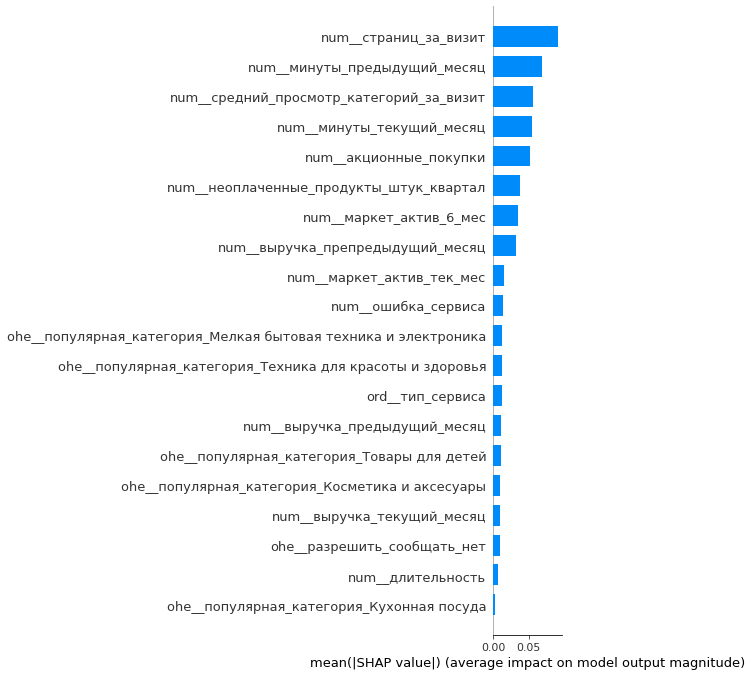

In [61]:
X_train_new = randomized_search.best_estimator_['preprocessor'].transform(X_train)
# Вся выборка черезмерно большая для выявления важности признаков. Можно оставить небольшую часть, для оптимизации.
X_train_sample = shap.sample(X_train_new, 50) # 50 - количество примеров.
# В Explainer подаём классификатор без лишнего обучения
explainer = shap.PermutationExplainer(randomized_search.best_estimator_['models'].predict_proba, X_train_sample)
    
labels = randomized_search.best_estimator_[:-1].get_feature_names_out()

shap.summary_plot(explainer.shap_values(X_train_sample)[..., 1], X_train_sample, plot_type='bar', feature_names=labels)

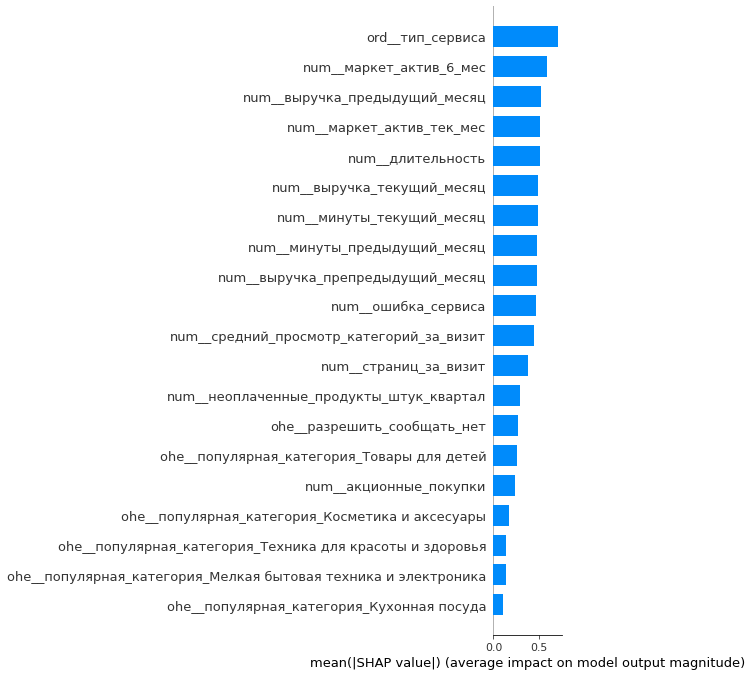

In [57]:
#поиск важных признаков
X_train_new = randomized_search.best_estimator_['preprocessor'].fit_transform(X_train)

model = randomized_search.best_estimator_['models'].fit(X_train_new, y_train)
explainer = shap.PermutationExplainer(model, X_train_new)

labels = randomized_search.best_estimator_[:-1].get_feature_names_out()

shap.summary_plot(X_train_new, plot_type='bar', feature_names=labels)

**Вывод:** наиболее важными признаками являются - `тип сервиса`, `маркет_актив_6_мес`, `выручка_предыдущий_месяц`, `маркет_актив_тек_месяц`, `длительность`.

## Сегментация покупателей

Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.
Выберем группу покупателей и предложим, как увеличить её покупательскую активность: 
проведем графическое и аналитическое исследование группы покупателей.
Сделаем предложения по работе с сегментом для увеличения покупательской активности.
Сделайте выводы о сегментах: какой сегмент вы взяли для дополнительного исследования, какие предложения вы сделали и почему.

In [58]:
# присоединяем датасет с прибылью
df_final = df_main.merge(df_money, on='id', how='left')
df_final.head() # проверяем

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   выручка_текущий_месяц  минуты_предыдущий_месяц  минуты_текущий_месяц  \
0                 4971.6                       12                    10   
1                 5058.4                        8                    13   
2                 6610.4                       11                    13   
3                 5872.5                        8                    11   
4                 5388.5                       10                    10   

   прибыль  
0     4.16  
1     3.13  
2     4.87  
3     4.21  
4     3.95

In [59]:
# выделяем сегмент покупателей с высокой и низкой прибылью, используя усредненный показатель прибыли
# mean_profit = df_money['прибыль'].mean()
# df_final['прибыль_сегмент'] = df_final['прибыль'].apply(lambda x: 'высокая_прибыль' if x > mean_profit else 'низкая_прибыль')
# df_final.head()

In [60]:
# предсказываем вероятность снижения в тренировочном и тестовом датасете и объединяем в единый датафрейм
X_test['вероятность_снижения'] = randomized_search.predict_proba(X_test)[:,1]
X_train['вероятность_снижения'] = randomized_search.predict_proba(X_train)[:,1]
X_final = pd.concat([X_train, X_test])
X_final.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
id                                                              
215858                     4           510               0.15   
215361                     4           199               0.23   
215884                     5           997               0.17   
216564                     4           342               0.94   
215715                     5           873               0.39   

                        популярная_категория  \
id                                             
215858  Мелкая бытовая техника и электроника   
215361        Техника для красоты и здоровья   
215884  Мелкая бытовая техника и электроника   
216564                       Кухонная посуда   
215715                      Товары для детей   

        средний_просмотр_категорий_за_визит  \
id                                            
215858                                    2   
215361                                    4   
215884                                    5   
216564                                    2   
215715                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215858                                   4               7                16   
215361                                   5               2                 3   
215884                                   1               3                11   
216564                                   7               5                 8   
215715                                   2               2                 5   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215858                    5170.5                       4347.0   
215361                    6400.0                       4597.0   
215884                    4113.0                       4626.0   
216564                    4930.0                       5269.0   
215715                    3716.0                       4691.0   

        выручка_текущий_месяц  минуты_предыдущий_месяц  минуты_текущий_месяц  \
id                                                                             
215858                 6014.2                       20                     6   
215361                 3789.7                       11                    13   
215884                 3798.4                       13                    10   
216564                 4766.2                       14                    19   
215715                 4600.0                       10                    10   

        вероятность_снижения  
id                            
215858              0.077528  
215361              0.798565  
215884              0.093752  
216564              0.509544  
215715              0.943916

In [61]:
# добавляем столбец с вероятностью снижения
df_final = df_final.merge(X_final['вероятность_снижения'], on='id', how='left')
df_final.head() # проверяем

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   выручка_текущий_месяц  минуты_предыдущий_месяц  минуты_текущий_месяц  \
0                 4971.6                       12                    10   
1                 5058.4                        8                    13   
2                 6610.4                       11                    13   
3                 5872.5                        8                    11   
4                 5388.5                       10                    10   

   прибыль  вероятность_снижения  
0     4.16              0.952606  
1     3.13              0.632588  
2     4.87              0.858533  
3     4.21              0.950766  
4     3.95              0.817457

In [62]:
# выделяем сегмент покупателй с высокой прибылью
# df_segment = df_final.query('прибыль_сегмент ==  "высокая_прибыль"')
# df_segment.sample(10) # проверяем

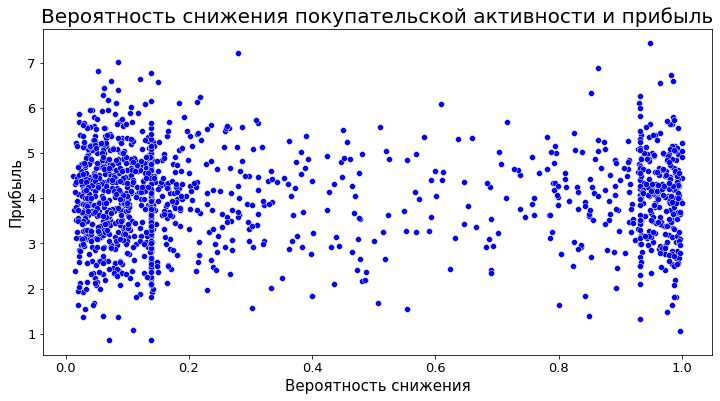

In [63]:
# смотрим распределение вероятности снижения активности в зависимости от прибыли
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_final, x='вероятность_снижения', y='прибыль', color='blue')
plt.title('Вероятность снижения покупательской активности и прибыль', size=20)
plt.xlabel('Вероятность снижения', size=15)
plt.ylabel('Прибыль', size=15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

В верхем правом углу располжены интересующие нас покупатели с высокой прибылью и высокой вероятностью снижения покупательской активности. Определи пограничные значения вероятности снижения покупательской активности в 0.7, прибыли больше 3.

In [64]:
# выделяем сегмент
df_segment = df_final.query('прибыль > 3 & вероятность_снижения > 0.7')
df_segment.sample(10) # проверяем

id покупательская_активность тип_сервиса разрешить_сообщать  \
108  215460                 Снизилась    стандарт                 да   
234  215586                 Снизилась     премиум                 да   
43   215395                 Снизилась     премиум                 да   
138  215490                 Снизилась    стандарт                 да   
299  215651                 Снизилась    стандарт                нет   
301  215653                 Снизилась    стандарт                нет   
77   215429                 Снизилась     премиум                нет   
356  215708                 Снизилась     премиум                 да   
376  215728                 Снизилась    стандарт                нет   
49   215401                 Снизилась     премиум                 да   

     маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
108                 3.5                     3           720   
234                 4.1                     4           557   
43                  1.5                     5           645   
138                 4.1                     4           922   
299                 2.4                     3           715   
301                 5.6                     5           181   
77                  0.9                     4           690   
356                 3.9                     3           570   
376                 4.0                     3           780   
49                  3.4                     5           339   

     акционные_покупки                  популярная_категория  \
108               0.30                     Домашний текстиль   
234               0.94        Техника для красоты и здоровья   
43                0.27                      Товары для детей   
138               0.35                      Товары для детей   
299               0.40                       Кухонная посуда   
301               0.31  Мелкая бытовая техника и электроника   
77                0.24                     Домашний текстиль   
356               0.40                       Кухонная посуда   
376               0.30                 Косметика и аксесуары   
49                0.30                 Косметика и аксесуары   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
108                                    2                                   6   
234                                    1                                   8   
43                                     3                                   3   
138                                    6                                   7   
299                                    3                                   5   
301                                    1                                   5   
77                                     2                                   5   
356                                    3                                   8   
376                                    4                                   0   
49                                     2                                   3   

     ошибка_сервиса  страниц_за_визит  выручка_предыдущий_месяц  \
108               4                 2                    5864.5   
234               3                 3                    4148.0   
43                6                 5                    5297.5   
138               1                 5                    4849.0   
299               5                 5                    5109.5   
301               3                 4                    5121.0   
77                7                 4                    3662.0   
356               2                 3                    6085.5   
376               2                 6                    4652.0   
49                3                 4                    5548.5   

     выручка_препредыдущий_месяц  выручка_текущий_месяц  \
108                       4729.0                 6063.4   
234                       4349.0                 3742.4   
43                   

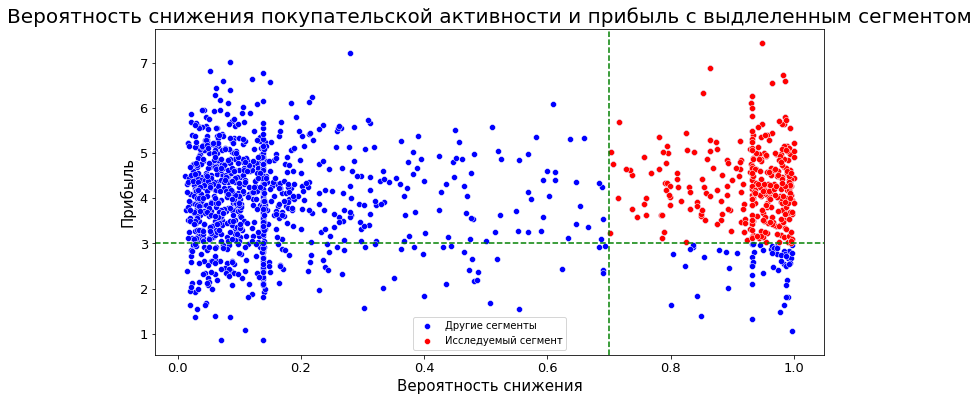

In [65]:
# визуализируем данные
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_final, x='вероятность_снижения', y='прибыль', label='Другие сегменты', color='blue')
sns.scatterplot(data=df_segment, x='вероятность_снижения', y='прибыль', label='Исследуемый сегмент', color='red')
plt.legend()
plt.axvline(x=0.7, color='green', linestyle='--')
plt.axhline(y=3, color='green', linestyle='--')
plt.title('Вероятность снижения покупательской активности и прибыль c выдлеленным сегментом', size=20)
plt.xlabel('Вероятность снижения', size=15)
plt.ylabel('Прибыль', size=15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

In [66]:
df_segment.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
       'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'прибыль',
       'вероятность_снижения'],
      dtype='object')

In [67]:
# функция для визуализации сравнения категориальных значений
def viz_seg_cat(df1, df2, feature):
    print(f'Статистика для клиентов выбранного сегмента по признаку "{feature}":')
    display(df2[feature].describe())
    print(f'Статистика для всех клиентов по признаку "{feature}":')
    display(df1[feature].describe())
    
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=df1, color='blue')
    sns.countplot(x=feature, data=df2, color='red')
    plt.title(f'Признак "{feature}" в выбранном сегменте покупателей')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel('Количество клиентов')
    plt.show()

Статистика для клиентов выбранного сегмента по признаку "тип_сервиса":


count          324
unique           2
top       стандарт
freq           209
Name: тип_сервиса, dtype: object

Статистика для всех клиентов по признаку "тип_сервиса":


count         1296
unique           2
top       стандарт
freq           922
Name: тип_сервиса, dtype: object

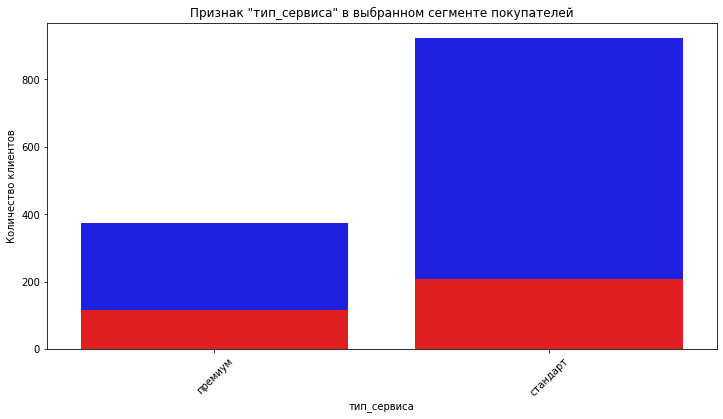

Статистика для клиентов выбранного сегмента по признаку "разрешить_сообщать":


count     324
unique      2
top        да
freq      248
Name: разрешить_сообщать, dtype: object

Статистика для всех клиентов по признаку "разрешить_сообщать":


count     1296
unique       2
top         да
freq       959
Name: разрешить_сообщать, dtype: object

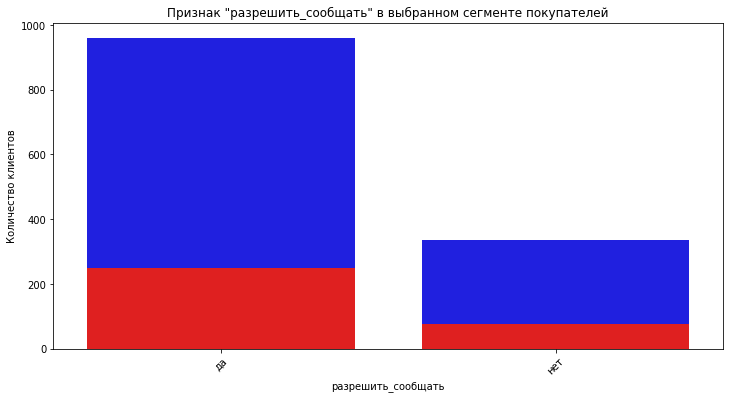

Статистика для клиентов выбранного сегмента по признаку "популярная_категория":


count                  324
unique                   6
top       Товары для детей
freq                   104
Name: популярная_категория, dtype: object

Статистика для всех клиентов по признаку "популярная_категория":


count                 1296
unique                   6
top       Товары для детей
freq                   329
Name: популярная_категория, dtype: object

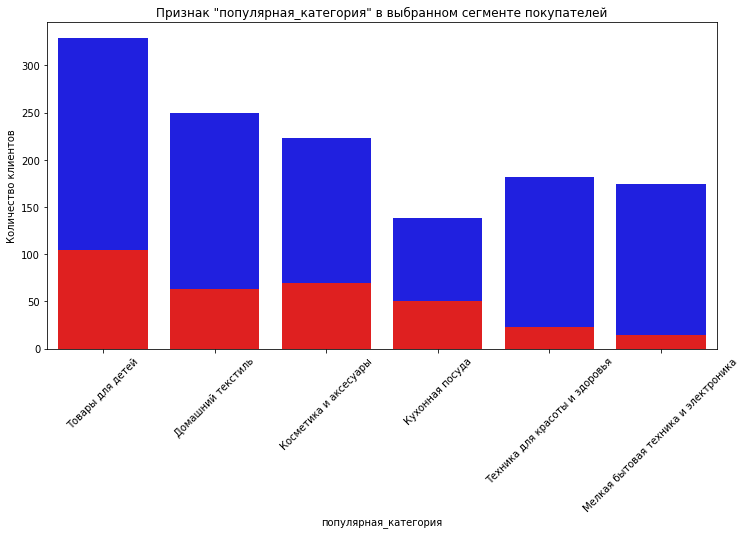

In [68]:
# выберем несколько категорий для сравнения
features_cat = ['тип_сервиса',
                'разрешить_сообщать',
                'популярная_категория']

for feature in features_cat:
    viz_seg_cat(df_final, df_segment, feature)

In [69]:
# функция для визуализации сравнения количественных значений
def viz_seg_num(df1, df2, feature):
    print(f'Статистика для клиентов выбранного сегмента по признаку "{feature}":')
    display(df2[feature].describe())
    print(f'Статистика для всех клиентов по признаку "{feature}":')
    display(df1[feature].describe())
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df1, x=feature, kde=True, color='blue')
    sns.histplot(df2, x=feature, kde=True, color='red')
    plt.title(f'Признак "{feature}" в выбранном сегменте покупателей')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

Статистика для клиентов выбранного сегмента по признаку "маркет_актив_6_мес":


count    324.000000
mean       3.510802
std        0.999523
min        0.900000
25%        3.000000
50%        3.700000
75%        4.100000
max        5.600000
Name: маркет_актив_6_мес, dtype: float64

Статистика для всех клиентов по признаку "маркет_актив_6_мес":


count    1296.000000
mean        4.256404
std         1.013525
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

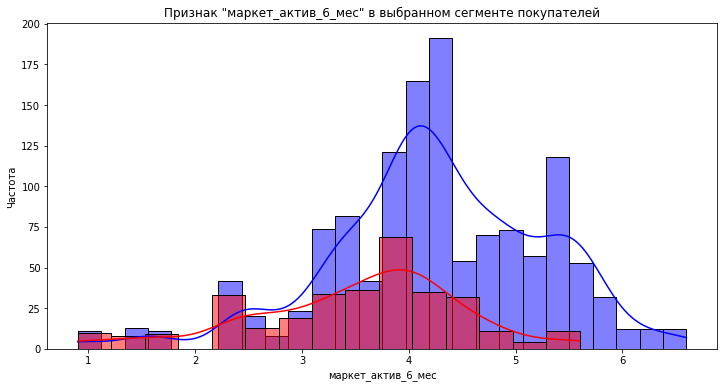

Статистика для клиентов выбранного сегмента по признаку "выручка_предыдущий_месяц":


count     324.000000
mean     4985.362654
std       835.982967
min      2909.000000
25%      4450.750000
50%      5081.000000
75%      5606.000000
max      6869.500000
Name: выручка_предыдущий_месяц, dtype: float64

Статистика для всех клиентов по признаку "выручка_предыдущий_месяц":


count    1296.000000
mean     4947.468750
std       700.797239
min      2890.000000
25%      4498.125000
50%      5005.500000
75%      5405.625000
max      6869.500000
Name: выручка_предыдущий_месяц, dtype: float64

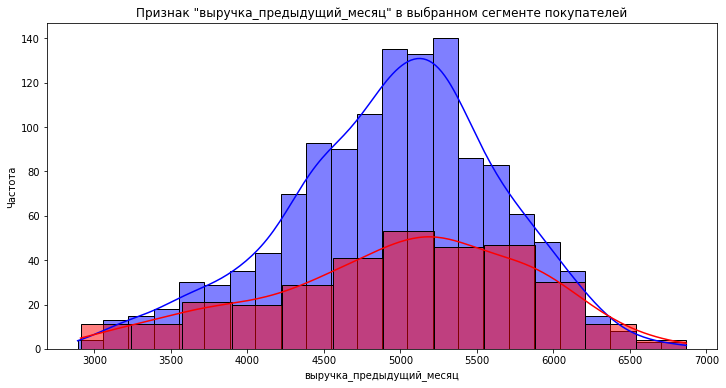

Статистика для клиентов выбранного сегмента по признаку "маркет_актив_тек_мес":


count    324.000000
mean       4.027778
std        0.718508
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: маркет_актив_тек_мес, dtype: float64

Статистика для всех клиентов по признаку "маркет_актив_тек_мес":


count    1296.000000
mean        4.009259
std         0.696316
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

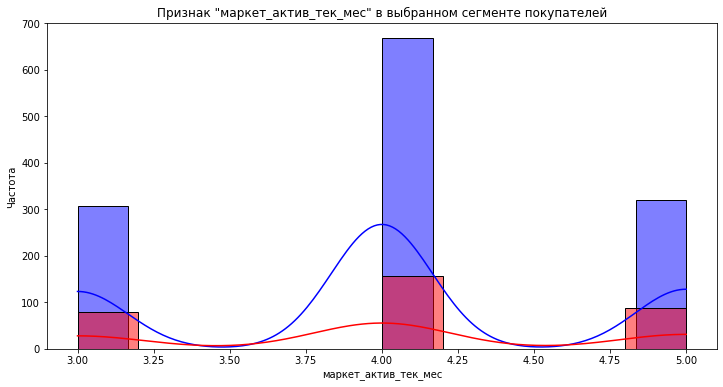

Статистика для клиентов выбранного сегмента по признаку "длительность":


count     324.000000
mean      629.358025
std       227.907526
min       135.000000
25%       465.500000
50%       645.500000
75%       808.750000
max      1076.000000
Name: длительность, dtype: float64

Статистика для всех клиентов по признаку "длительность":


count    1296.000000
mean      602.967593
std       249.195823
min       121.000000
25%       409.500000
50%       606.500000
75%       806.250000
max      1079.000000
Name: длительность, dtype: float64

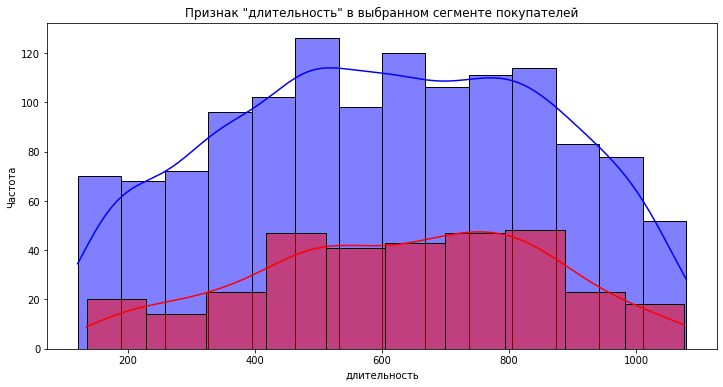

Статистика для клиентов выбранного сегмента по признаку "страниц_за_визит":


count    324.000000
mean       4.268519
std        2.089068
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       14.000000
Name: страниц_за_визит, dtype: float64

Статистика для всех клиентов по признаку "страниц_за_визит":


count    1296.000000
mean        8.187500
std         3.978459
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

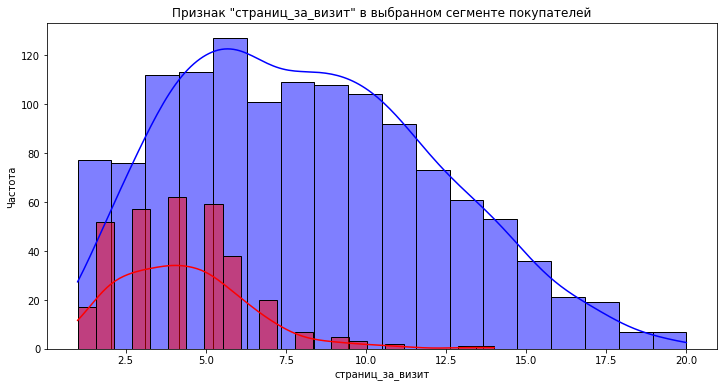

Статистика для клиентов выбранного сегмента по признаку "акционные_покупки":


count    324.000000
mean       0.503858
std        0.303980
min        0.120000
25%        0.280000
50%        0.350000
75%        0.902500
max        0.990000
Name: акционные_покупки, dtype: float64

Статистика для всех клиентов по признаку "акционные_покупки":


count    1296.000000
mean        0.320069
std         0.249159
min         0.110000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

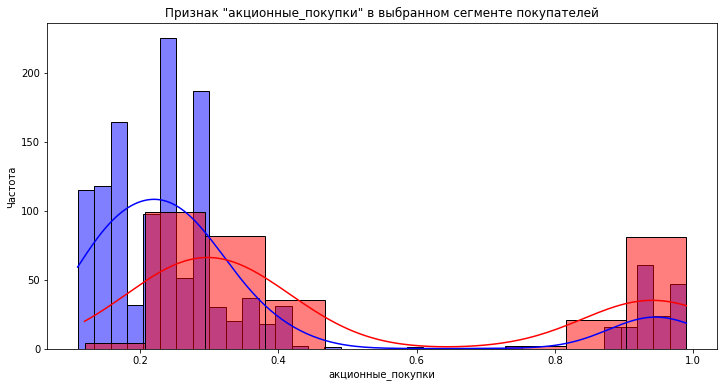

In [70]:
# выберем несколько категорий для сравнения
features_num = ['маркет_актив_6_мес', 
                'выручка_предыдущий_месяц', 
                'маркет_актив_тек_мес', 
                'длительность',
                'страниц_за_визит',
                'акционные_покупки']
                
for feature in features_num:
    viz_seg_num(df_final, df_segment, feature)

**Вывод:** был выделен сегмент покупателей с высокой прибылью и высокой предсказанной вероятностью снижения активности. 

Можно отметить, что покупательская активность снизилась у покупателей со стандартным типом сервиса. Также снизилась покупательская активность у клиентов с низкой маркетинговой активностью в течение последних 6 месяцев. Как следние снижения покупательской активность можно отметить и снижение выручки с данных клиентов. Можно отметить, что количество клиентов со снижением покупательской активности со временем растёт. Страниц за визит у выбранного сегмента меньше.

В связи с данными наблюдениями можно сделать следующие рекомендации:
* Предложить покупателям со стандартным типом сервиса различные промоакции со временным переходом на премиум сервис
* Повысить маркетинговую активность и коммуникацию с пользователями
* Обратить внимание на давно зарегистрированных пользователей и также расширить с ними коммуникацию
* Повысить количество просмотренных страниц у выбранного сегмента пользователей, за счет предложения индивидуальных систем прокодов или возмодных бонусов за покупку

Из общих рекомендаций можно предложить расширение ассортимента в популярных категориях, обновление списка акционных товаров, расширение промопредложений и актуализация их для давно зарегистрированных покупателей.

## Общий вывод

В ходе работы над проектом:
* Данные были загружены и изучены. Явных дубликатов и пустых значений не наблюдается. В датасете market_file в признаке `Тип сервиса` имеется опечатка (стандартт), в датасете market_time в признаке `Период` имеется опечатка (предыдцщий_месяц).
* Названия столбцов и строковые значения приведены к единому формату. Удалены скрытые дубликаты и исправлены грамматические ошибки.
* Проведен исследовательский анализ данных:
     * В датасете `market_file` - признак `маркет_актив_6_мес` имеет распределение близкое к нормальному. Однако имеются несколько малых значений. Признак `актив_тек_мес` имеет 3 значения. Признак `длительность` имеет близкое к нормальному распределение. Признак `акционные_покупки` имеет бимодальное распределение. Признаки `средний_просмотр_категорий_за_визит`, `неоплаченные_продукты_штук_квартал`, `ошибка_сервиса`, `страниц_за_визит` - прослеживается нормальное распределение.
     * В датасете `market_money` - при работе с датафреймом были удалены аномальные значения. Признак `выручка` распределен нормально. Несмотря на то, что в каждый из трех месяцев были приблизтельно одинаковое количество покупателей, показатели распределения выручки с покупателей в разные месяцы различались. 
     * В датасете `market_time` - можно наблюдать распределение признака `минуты` близкое к нормальному. Количество покупателей в предыдущий и текущий месяц одинаково.
     * В датасете `money` - признак `прибыль` в датасете `money` распределен нормально.
     * Клиенты с покупательской активностью не менее трёх месяцев отобраны в соответсвии с заданием.
* Были объединены таблицы market_file.csv, market_money.csv, market_time.csv.
* Была изучена корреляция с целевым признаком покупательская_активность больше 0.5 отмечается у следующих признаков: маркет_актив_6_мес (0.54), акционные_покупки (0.51), средний_просмотр_категорий_за _визит (0.54), неоплаченные_продукты_штук_квартал (0.51), страниц_за_визит (0.75), выручка_предыдущий_месяц (0.50), минуты_предыдущий_месяц (0.69), минуты_текущий_месяц (0.58). Мультиколинеарность отсутсвует. Также сильная корреляци янаблюдается между признаками выручка_предыдущий_месяц и выручка_текущий месяц.
* Были созданы пайпланы для подготовки признаков и перебора моделей и гиперпараметров для них, которые были собраны в полный пайплайн. Наилучший результат метрики ROC-AUC (0.915) показала модель SVC  с гиперпараметром models__kernel - rbf.
* Был проведен анализ важности признаков. Наиболее важными признаками являются - `тип сервиса`, `маркет_актив_6_мес`, `выручка_предыдущий_месяц`, `маркет_актив_тек_месяц`, `длительность`.
* Впоследствии был выделен сегмент покупателей с высокой прибылью и высокой предсказанной вероятностью снижения активности. Можно отметить, что покупательская активность снизилась у покупателей со стандартным типом сервиса. Также снизилась покупательская активность у клиентов с низкой маркетинговой активностью в течение последних 6 месяцев. Как следние снижения покупательской активность можно отметить и снижение выручки с данных клиентов. Можно отметить, что количество клиентов со снижением покупательской активности со временем растёт. В связи с данными наблюдениями можно сделать следующие рекомендации:
    * Предложить покупателям со стандартным типом сервиса различные промоакции со временным переходом на премиум сервис
    * Повысить маркетинговую активность и коммуникацию с пользователями
    * Обратить внимание на давно зарегистрированных пользователей и также расширить с ними коммуникацию
    * Повысить количество просмотренных страниц у выбранного сегмента пользователей, за счет предложения индивидуальных систем прокодов или возможных бонусов за покупку

* Из общих рекомендаций можно предложить расширение ассортимента в популярных категориях, обновление списка акционных товаров, расширение промопредложений и актуализация их для давно зарегистрированных покупателей.
